# Contents

Based on previous exploration of the data, the following hypothesis were formulated and will be tested here:

1) Price development differs significantly between NCY's bouroghs Manhattan, Bronx, Brooklyn, Queens, and Staten Island.

2) Price development differs significantly between primarily residential and primariliy non-residential properties.

3) Price development was affected by events such as the financial and banking crisis of 2008 or the Covid pandemic.

## 01 Import libraries and data

## 02 Data cleaning and consistency checks

## 03 Column derivation and data (dis)aggregation

## 04 Initial data exploration

## 05 Splitting data

### 05.1 Manhattan

### 05.2 Bronx

### 05.3 Brooklyn

### 05.4 Queens

### 05.5 Staten Island

## 06 Exploring relationships between sale price and other variables

### 06.1 Correlation heatmaps Manhattan

### 06.2 Correlation heatmaps Bronx

### 06.3 Correlation heatmaps Brooklyn

### 06.4 Correlation heatmaps Queens

### 06.5 Correlation heatmaps Staten Island

### 06.6 Scatterplot of prices and total number of units for residential sales in Manhattan

### 06.7 Scatterplot of prices and property size for residential sales in Manhattan

### 06.8 Scatterplot of prices and property size for residential sales in the Bronx

## 07 Cluster analysis

### 07.1 Data pre-processing I

### 07.2 k-means clustering I

### 07.3 Visualise clustered data I

### 07.4 Data pre-processing II

### 07.5 k-means clustering II

### 07.6 Visualise clustered data II

### 07.7 Data pre-processing III

### 07.8 k-means clustering III

### 07.9 Visualise clustered data III

### 07.10 Data pre-processing IV

### 07.11 k-means clustering IV

### 08 Time series analysis

### 08.1 Data pre-processing

### 08.2 Time series visualisation

## 09 Export dataframes

# 01 Import libraries and data

In [1]:
# Import numeric computation libraries
import pandas as pd
import numpy as np
import pylab as pl
import os

# Import visualisation libraries
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt

# Import geographical analysis and visualisation libraries
import folium
import json

# Import supervised and unsupervised ML libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Import time series analysis libraries
import statsmodels.api as sm

In [2]:
# Define path variable 
path = r'/Users/DanielaDietmayr/Library/CloudStorage/OneDrive-Personal/2023-05-07_NYC property sales/02_Data/02_Prepared data'

# Import data
df = pd.read_pickle(os.path.join(path, '2023-06-18_df.pkl'))

# 02 Data cleaning and consistency checks

In [209]:
# Get dimensions of df
df.shape

(1665722, 16)

In [3]:
# Columns and datatypes
df.dtypes

borough_code                              object
neighborhood                              object
building_class_category                   object
tax_class_at_present                      object
easement                                  object
building_class_at_present                 object
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale                 object
building_class_at_time_of_sale            object
sale_price                               float64
sale_date                         datetime64[ns]
sale_price_flag                           object
borough_name                              object
age_cluster                               object
price_cluster                             object
dtype: object

In [4]:
# Inspect head
df.head()

borough_code neighborhood  building_class_category tax_class_at_present  \
0            5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   
1            5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   
3            5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   
5            5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   
6            5     ANNADALE  01 ONE FAMILY DWELLINGS                    1   

  easement building_class_at_present  residential_units  commercial_units  \
0      NaN                        A5                  1                 0   
1      NaN                        A1                  1                 0   
3      NaN                        A2                  1                 0   
5      NaN                        A1                  1                 0   
6      NaN                        A1                  1                 0   

   total_units  land_square_feet  gross_square_feet  year_built  \
0            1            3654.0              910.0        2002   
1            1            7654.0             2277.0        1980   
3            1            8190.0             1528.0        1970   
5            1            5999.0             3250.0        1989   
6            1            6200.0             2580.0        1975   

  tax_class_at_time_of_sale building_class_at_time_of_sale  sale_price  \
0                         1                             A5    764000.0   
1                         1                             A1   1098000.0   
3                         1                             A2    890000.0   
5                         1                             A1   1050000.0   
6                         1                             A1    910000.0   

   sale_date sale_price_flag   borough_name          age_cluster  \
0 2022-06-30             nan  Staten Island  medium-age building   
1 2022-08-19             nan  Staten Island  medium-age building   
3 2022-01-03             nan  Staten Island         new building   
5 2022-08-31             nan  Staten Island  medium-age building   
6 2022-04-05             nan  Staten Island         new building   

     price_cluster  
0  very low-priced  
1  very low-priced  
3  very low-priced  
5  very low-priced  
6  very low-priced

In [5]:
# Drop irrelevant or inaccurate columns
df = df.drop(['neighborhood', 'building_class_category', 'tax_class_at_present', 'easement', 'building_class_at_present', 'age_cluster', 'price_cluster'], axis=1)

# Rename columns
df.rename(columns={'sale_price_flag':'sale_or_transfer'}, inplace=True)

# Replace values in sale_or_transfer
df['sale_or_transfer'].replace('transf_ownership', 'ownership transfer', inplace=True)
df['sale_or_transfer'].replace('nan', 'sale', inplace=True)

# Inspect head after renaming columns and replacing values
df.head()

borough_code  residential_units  commercial_units  total_units  \
0            5                  1                 0            1   
1            5                  1                 0            1   
3            5                  1                 0            1   
5            5                  1                 0            1   
6            5                  1                 0            1   

   land_square_feet  gross_square_feet  year_built tax_class_at_time_of_sale  \
0            3654.0              910.0        2002                         1   
1            7654.0             2277.0        1980                         1   
3            8190.0             1528.0        1970                         1   
5            5999.0             3250.0        1989                         1   
6            6200.0             2580.0        1975                         1   

  building_class_at_time_of_sale  sale_price  sale_date sale_or_transfer  \
0                             A5    764000.0 2022-06-30             sale   
1                             A1   1098000.0 2022-08-19             sale   
3                             A2    890000.0 2022-01-03             sale   
5                             A1   1050000.0 2022-08-31             sale   
6                             A1    910000.0 2022-04-05             sale   

    borough_name  
0  Staten Island  
1  Staten Island  
3  Staten Island  
5  Staten Island  
6  Staten Island

# 03 Column derivation and data (dis)aggregation

In [6]:
# Get frequency of tax classes (1 applies to residential-only properties, 2 to primarily residential properties, 3 and 4 apply to non-residential properties)
df['tax_class_at_time_of_sale'].value_counts()

1    888378
2    669706
4    107628
3        10
Name: tax_class_at_time_of_sale, dtype: int64

In [7]:
# Print observations with tax class 3
df.loc[df['tax_class_at_time_of_sale'] == '3']

borough_code  residential_units  commercial_units  total_units  \
674734             2                  0                 1            1   
674735             2                  0                 1            1   
1071593            3                  0                 1            1   
1179119            4                  0               129          129   
1210896            1                  0                 1            1   
1245723            2                  0                 1            1   
1551453            1                  0                 1            1   
1743263            3                  0                 0            0   
1146840            3                  0                 1            1   
1551452            1                  0                 1            1   

         land_square_feet  gross_square_feet  year_built  \
674734             7200.0             7200.0        1930   
674735             7200.0             7200.0        1930   
1071593          100467.0                1.0        2011   
1179119           20660.0            49001.0        2010   
1210896           12589.0            36000.0        1950   
1245723           46950.0            58566.0        1972   
1551453           57581.0           377493.0        1956   
1743263          428555.0              300.0        1983   
1146840          100467.0                1.0        2011   
1551452           57581.0           377493.0        1956   

        tax_class_at_time_of_sale building_class_at_time_of_sale  sale_price  \
674734                          3                             U7    475000.0   
674735                          3                             U7         1.0   
1071593                         3                             U7  20169863.0   
1179119                         3                             U4   6500000.0   
1210896                         3                             U1  23000000.0   
1245723                         3                             U4   5500000.0   
1551453                         3                             U4  31250000.0   
1743263                         3                             U5  15600000.0   
1146840                         3                             U7         0.0   
1551452                         3                             U4         0.0   

         sale_date    sale_or_transfer borough_name  
674734  2014-07-23                sale        Bronx  
674735  2014-07-23                sale        Bronx  
1071593 2010-03-04                sale     Brooklyn  
1179119 2008-09-11                sale       Queens  
1210896 2008-09-26                sale    Manhattan  
1245723 2008-12-18                sale        Bronx  
1551453 2006-01-09                sale    Manhattan  
1743263 2004-10-28                sale     Brooklyn  
1146840 2009-08-26  ownership transfer     Brooklyn  
1551452 2006-10-18  ownership transfer    Manhattan

In [8]:
# Print observations with tax class 4
df.loc[df['tax_class_at_time_of_sale'] == '4']

borough_code  residential_units  commercial_units  total_units  \
185                5                  1                 1            1   
186                5                  1                 1            1   
568                5                  0                 1            1   
569                5                  0                 1            1   
570                5                  0                 2            2   
...              ...                ...               ...          ...   
1915803            2                  0                 6            6   
1916140            2                  0                 1            1   
1916142            2                  0                 2            2   
1916144            2                  0                 1            1   
1916259            2                  0                 1            1   

         land_square_feet  gross_square_feet  year_built  \
185                1975.0             1346.0        1975   
186                1975.0             1346.0        1975   
568               19900.0             3000.0        1989   
569               19899.0             3200.0        2000   
570               26856.0            19125.0        2007   
...                   ...                ...         ...   
1915803            5113.0             5113.0        1925   
1916140            2375.0             1433.0        1915   
1916142            2006.0             3250.0        1930   
1916144            2375.0              949.0        1927   
1916259            9699.0             3400.0        1970   

        tax_class_at_time_of_sale building_class_at_time_of_sale  sale_price  \
185                             4                             RK    150000.0   
186                             4                             RK    440000.0   
568                             4                             G2   1400000.0   
569                             4                             E9   2000000.0   
570                             4                             E1   3800000.0   
...                           ...                            ...         ...   
1915803                         4                             K1         0.0   
1916140                         4                             K1         0.0   
1916142                         4                             K2         0.0   
1916144                         4                             G2         0.0   
1916259                         4                             K1         0.0   

         sale_date    sale_or_transfer   borough_name  
185     2022-01-10                sale  Staten Island  
186     2022-10-24                sale  Staten Island  
568     2022-04-22                sale  Staten Island  
569     2022-10-11                sale  Staten Island  
570     2022-11-08                sale  Staten Island  
...            ...                 ...            ...  
1915803 2022-07-22  ownership transfer          Bronx  
1916140 2022-10-27  ownership transfer          Bronx  
1916142 2022-06-06  ownership transfer          Bronx  
1916144 2022-10-13  ownership transfer          Bronx  
1916259 2022-12-12  ownership transfer          Bronx  

[107628 rows x 13 columns]

In [9]:
# Derive column identifying sales as residential/non-residential
df.loc[df['tax_class_at_time_of_sale'].isin(['1', '2']), 'resid_or_non-resid'] = 'residential'
df.loc[df['tax_class_at_time_of_sale'].isin(['3', '4']), 'resid_or_non-resid'] = 'non-residential'

# Inspect head after deriving column
df.head()

borough_code  residential_units  commercial_units  total_units  \
0            5                  1                 0            1   
1            5                  1                 0            1   
3            5                  1                 0            1   
5            5                  1                 0            1   
6            5                  1                 0            1   

   land_square_feet  gross_square_feet  year_built tax_class_at_time_of_sale  \
0            3654.0              910.0        2002                         1   
1            7654.0             2277.0        1980                         1   
3            8190.0             1528.0        1970                         1   
5            5999.0             3250.0        1989                         1   
6            6200.0             2580.0        1975                         1   

  building_class_at_time_of_sale  sale_price  sale_date sale_or_transfer  \
0                             A5    764000.0 2022-06-30             sale   
1                             A1   1098000.0 2022-08-19             sale   
3                             A2    890000.0 2022-01-03             sale   
5                             A1   1050000.0 2022-08-31             sale   
6                             A1    910000.0 2022-04-05             sale   

    borough_name resid_or_non-resid  
0  Staten Island        residential  
1  Staten Island        residential  
3  Staten Island        residential  
5  Staten Island        residential  
6  Staten Island        residential

In [10]:
# Check accuracy of derived column
df['resid_or_non-resid'].value_counts()

residential        1558084
non-residential     107638
Name: resid_or_non-resid, dtype: int64

# 04 Initial data exploration

In [11]:
# Compare sale prices across boroughs and residential vs. non-residential properties
df.groupby(['borough_name', 'sale_or_transfer', 'resid_or_non-resid']).agg({'sale_price': ['min', 'mean', 'max']})

sale_price                \
                                                           min          mean   
borough_name  sale_or_transfer   resid_or_non-resid                            
Bronx         ownership transfer non-residential           0.0  0.000000e+00   
                                 residential               0.0  0.000000e+00   
              sale               non-residential           1.0  3.129943e+06   
                                 residential               1.0  7.047458e+05   
Brooklyn      ownership transfer non-residential           0.0  0.000000e+00   
                                 residential               0.0  0.000000e+00   
              sale               non-residential           1.0  3.215195e+06   
                                 residential               1.0  8.619621e+05   
Manhattan     ownership transfer non-residential           0.0  0.000000e+00   
                                 residential               0.0  0.000000e+00   
              sale               non-residential           1.0  1.522595e+07   
                                 residential               1.0  2.013726e+06   
Queens        ownership transfer non-residential           0.0  0.000000e+00   
                                 residential               0.0  0.000000e+00   
              sale               non-residential           1.0  3.422854e+06   
                                 residential               1.0  6.049957e+05   
Staten Island ownership transfer non-residential           0.0  0.000000e+00   
                                 residential               0.0  0.000000e+00   
              sale               non-residential           1.0  1.707996e+06   
                                 residential               1.0  4.687901e+05   

                                                                   
                                                              max  
borough_name  sale_or_transfer   resid_or_non-resid                
Bronx         ownership transfer non-residential     0.000000e+00  
                                 residential         0.000000e+00  
              sale               non-residential     1.329250e+08  
                                 residential         1.372983e+08  
Brooklyn      ownership transfer non-residential     0.000000e+00  
                                 residential         0.000000e+00  
              sale               non-residential     4.994012e+08  
                                 residential         8.696129e+08  
Manhattan     ownership transfer non-residential     0.000000e+00  
                                 residential         0.000000e+00  
              sale               non-residential     2.800000e+09  
                                 residential         4.111112e+09  
Queens        ownership transfer non-residential     0.000000e+00  
                                 residential         0.000000e+00  
              sale               non-residential     4.810936e+08  
                                 residential         4.750000e+08  
Staten Island ownership transfer non-residential     0.000000e+00  
                                 residential         0.000000e+00  
              sale               non-residential     1.894423e+08  
                                 residential         5.870000e+07

This aggregation shows that non-residential properties are on average significantly more expensive than residential units across all boroughs, and that the highest prices are found in Manhattan. 

Furthermore, while minimum prices such as 1 US Dollar may constitute a sale from a legal perspective, it is better to look at such low-price sales seperately. Even without industry knowledge, it is safe to assume that sale prices up to 1111 US Dollar represent a symbolic rather than a realistic property price. They will therefore be identified as "symbolic sale".

In [12]:
# Replace values in sale_or_transfer
df['sale_or_transfer'].replace('sale', 'regular sale', inplace=True)

# Identify low-price sales
df.loc[(df['sale_price'] >0) & (df['sale_price'] <= 1111), 'sale_or_transfer'] = 'symbolic sale'

In [13]:
# Compare sale prices across boroughs and residential vs. non-residential properties
df.groupby(['borough_name', 'sale_or_transfer', 'resid_or_non-resid']).agg({'sale_price': ['min', 'mean', 'max']})

sale_price                \
                                                           min          mean   
borough_name  sale_or_transfer   resid_or_non-resid                            
Bronx         ownership transfer non-residential           0.0  0.000000e+00   
                                 residential               0.0  0.000000e+00   
              regular sale       non-residential        2000.0  3.246097e+06   
                                 residential            1250.0  7.219128e+05   
              symbolic sale      non-residential           1.0  7.517297e+01   
                                 residential               1.0  1.376491e+02   
Brooklyn      ownership transfer non-residential           0.0  0.000000e+00   
                                 residential               0.0  0.000000e+00   
              regular sale       non-residential        1200.0  3.307104e+06   
                                 residential            1160.0  8.824676e+05   
              symbolic sale      non-residential           1.0  1.543780e+02   
                                 residential               1.0  1.079869e+02   
Manhattan     ownership transfer non-residential           0.0  0.000000e+00   
                                 residential               0.0  0.000000e+00   
              regular sale       non-residential        1200.0  1.570858e+07   
                                 residential            1175.0  2.025944e+06   
              symbolic sale      non-residential           1.0  7.230289e+01   
                                 residential               1.0  6.363278e+01   
Queens        ownership transfer non-residential           0.0  0.000000e+00   
                                 residential               0.0  0.000000e+00   
              regular sale       non-residential        1200.0  3.521021e+06   
                                 residential            1115.0  6.168672e+05   
              symbolic sale      non-residential           1.0  1.118194e+02   
                                 residential               1.0  1.531791e+02   
Staten Island ownership transfer non-residential           0.0  0.000000e+00   
                                 residential               0.0  0.000000e+00   
              regular sale       non-residential        2050.0  1.742217e+06   
                                 residential            1162.0  4.771042e+05   
              symbolic sale      non-residential           1.0  2.044808e+02   
                                 residential               1.0  1.800337e+02   

                                                                   
                                                              max  
borough_name  sale_or_transfer   resid_or_non-resid                
Bronx         ownership transfer non-residential     0.000000e+00  
                                 residential         0.000000e+00  
              regular sale       non-residential     1.329250e+08  
                                 residential         1.372983e+08  
              symbolic sale      non-residential     1.000000e+03  
                                 residential         1.006000e+03  
Brooklyn      ownership transfer non-residential     0.000000e+00  
                                 residential         0.000000e+00  
              regular sale       non-residential     4.994012e+08  
                                 residential         8.696129e+08  
              symbolic sale      non-residential     1.100000e+03  
                                 residential         1.110000e+03  
Manhattan     ownership transfer non-residential     0.000000e+00  
                                 residential         0.000000e+00  
              regular sale       non-residential     2.800000e+09  
                                 residential         4.111112e+09  
              symbolic sale      non-residential     1.030000e+03  
                                 residential       

In [14]:
# Check frequency of symbolic sales
df['sale_or_transfer'].value_counts()

regular sale          1160651
ownership transfer     483934
symbolic sale           21137
Name: sale_or_transfer, dtype: int64

# 05 Splitting data 

Based on the initial insights which showed that prices for non-residential properties are higher than for residential properites, and that prices are generally higher in Manhanttan than in the other boroughs, the dataframe will be split along those lines before further exploring the dataset.  

1 = Manhattan, 2 = Bronx, 3 = Brooklyn, 4 = Queens, 5 = Staten Island

In [15]:
# Get dimensions of df
df.shape

(1665722, 14)

In [16]:
# Split dataset according to boroughs
df1 = df.loc[df['borough_name'] == 'Manhattan']
df2 = df.loc[df['borough_name'] == 'Bronx']
df3 = df.loc[df['borough_name'] == 'Brooklyn']
df4 = df.loc[df['borough_name'] == 'Queens']
df5 = df.loc[df['borough_name'] == 'Staten Island']

In [17]:
# Check accuracy of split
len(df) == len(df1)+len(df2)+len(df3)+len(df4)+len(df5)

True

## 05.1 Manhattan

In [18]:
# Split Manhattan into ownership transfers, regular sales and smbolic sales
df1regsl = df1.loc[df1['sale_or_transfer'] == 'regular sale']
df1owntr = df1.loc[df1['sale_or_transfer'] == 'ownership transfer']
df1symsl = df1.loc[df1['sale_or_transfer'] == 'symbolic sale']

In [19]:
# Check accuracy of Manhattan split into ownership transfers, regular sales and smbolic sales
len(df1) == len(df1regsl)+len(df1owntr)+len(df1symsl)

True

In [20]:
# Split Manhattan datasets into residential and non-residential properties
df1regslresid = df1regsl.loc[df1regsl['resid_or_non-resid'] == 'residential']
df1regslnresid = df1regsl.loc[df1regsl['resid_or_non-resid'] == 'non-residential']
df1owntrresid = df1owntr.loc[df1owntr['resid_or_non-resid'] == 'residential']
df1owntrnresid = df1owntr.loc[df1owntr['resid_or_non-resid'] == 'non-residential']
df1symslresid = df1symsl.loc[df1symsl['resid_or_non-resid'] == 'residential']
df1symslnresid = df1symsl.loc[df1symsl['resid_or_non-resid'] == 'non-residential']

In [21]:
# Check accruracy of final Manhattan split
len(df1) == len(df1regslresid)+len(df1regslnresid)+len(df1owntrresid)+len(df1owntrnresid)+len(df1symslresid)+len(df1symslnresid)

True

## 05.2 Bronx

In [22]:
# Split Bronx into ownership transfers, regular sales and smbolic sales
df2regsl = df2.loc[df2['sale_or_transfer'] == 'regular sale']
df2owntr = df2.loc[df2['sale_or_transfer'] == 'ownership transfer']
df2symsl = df2.loc[df2['sale_or_transfer'] == 'symbolic sale']

In [23]:
# Check accuracy of Bronx split into ownership transfers, regular sales and smbolic sales
len(df2) == len(df2regsl)+len(df2owntr)+len(df2symsl)

True

In [24]:
# Split Bronx datasets into residential and non-residential properties
df2regslresid = df2regsl.loc[df2regsl['resid_or_non-resid'] == 'residential']
df2regslnresid = df2regsl.loc[df2regsl['resid_or_non-resid'] == 'non-residential']
df2owntrresid = df2owntr.loc[df2owntr['resid_or_non-resid'] == 'residential']
df2owntrnresid = df2owntr.loc[df2owntr['resid_or_non-resid'] == 'non-residential']
df2symslresid = df2symsl.loc[df2symsl['resid_or_non-resid'] == 'residential']
df2symslnresid = df2symsl.loc[df2symsl['resid_or_non-resid'] == 'non-residential']

In [25]:
# Check accruracy of final Manhattan split
len(df2) == len(df2regslresid)+len(df2regslnresid)+len(df2owntrresid)+len(df2owntrnresid)+len(df2symslresid)+len(df2symslnresid)

True

## 05.3 Brooklyn

In [26]:
# Split Brooklyn into ownership transfers, regular sales and smbolic sales
df3regsl = df3.loc[df3['sale_or_transfer'] == 'regular sale']
df3owntr = df3.loc[df3['sale_or_transfer'] == 'ownership transfer']
df3symsl = df3.loc[df3['sale_or_transfer'] == 'symbolic sale']

In [27]:
# Check accuracy of Brooklyn split into ownership transfers, regular sales and smbolic sales
len(df3) == len(df3regsl)+len(df3owntr)+len(df3symsl)

True

In [28]:
# Split Brooklyn datasets into residential and non-residential properties
df3regslresid = df3regsl.loc[df3regsl['resid_or_non-resid'] == 'residential']
df3regslnresid = df3regsl.loc[df3regsl['resid_or_non-resid'] == 'non-residential']
df3owntrresid = df3owntr.loc[df3owntr['resid_or_non-resid'] == 'residential']
df3owntrnresid = df3owntr.loc[df3owntr['resid_or_non-resid'] == 'non-residential']
df3symslresid = df3symsl.loc[df3symsl['resid_or_non-resid'] == 'residential']
df3symslnresid = df3symsl.loc[df3symsl['resid_or_non-resid'] == 'non-residential']

In [29]:
# Check accruracy of final Brooklyn split
len(df3) == len(df3regslresid)+len(df3regslnresid)+len(df3owntrresid)+len(df3owntrnresid)+len(df3symslresid)+len(df3symslnresid)

True

## 05.4 Queens

In [30]:
# Split Queens into ownership transfers, regular sales and smbolic sales
df4regsl = df4.loc[df4['sale_or_transfer'] == 'regular sale']
df4owntr = df4.loc[df4['sale_or_transfer'] == 'ownership transfer']
df4symsl = df4.loc[df4['sale_or_transfer'] == 'symbolic sale']

In [31]:
# Check accuracy of Queens split into ownership transfers, regular sales and smbolic sales
len(df4) == len(df4regsl)+len(df4owntr)+len(df4symsl)

True

In [32]:
# Split Queens datasets into residential and non-residential properties
df4regslresid = df4regsl.loc[df4regsl['resid_or_non-resid'] == 'residential']
df4regslnresid = df4regsl.loc[df4regsl['resid_or_non-resid'] == 'non-residential']
df4owntrresid = df4owntr.loc[df4owntr['resid_or_non-resid'] == 'residential']
df4owntrnresid = df4owntr.loc[df4owntr['resid_or_non-resid'] == 'non-residential']
df4symslresid = df4symsl.loc[df4symsl['resid_or_non-resid'] == 'residential']
df4symslnresid = df4symsl.loc[df4symsl['resid_or_non-resid'] == 'non-residential']

In [33]:
# Check accruracy of final Queens split
len(df4) == len(df4regslresid)+len(df4regslnresid)+len(df4owntrresid)+len(df4owntrnresid)+len(df4symslresid)+len(df4symslnresid)

True

## 05.5 Staten Island

In [34]:
# Split Staten Island into ownership transfers, regular sales and smbolic sales
df5regsl = df5.loc[df5['sale_or_transfer'] == 'regular sale']
df5owntr = df5.loc[df5['sale_or_transfer'] == 'ownership transfer']
df5symsl = df5.loc[df5['sale_or_transfer'] == 'symbolic sale']

In [35]:
# Check accuracy of Staten Island split into ownership transfers, regular sales and smbolic sales
len(df5) == len(df5regsl)+len(df5owntr)+len(df5symsl)

True

In [36]:
# Split Staten Island datasets into residential and non-residential properties
df5regslresid = df5regsl.loc[df5regsl['resid_or_non-resid'] == 'residential']
df5regslnresid = df5regsl.loc[df5regsl['resid_or_non-resid'] == 'non-residential']
df5owntrresid = df5owntr.loc[df5owntr['resid_or_non-resid'] == 'residential']
df5owntrnresid = df5owntr.loc[df5owntr['resid_or_non-resid'] == 'non-residential']
df5symslresid = df5symsl.loc[df5symsl['resid_or_non-resid'] == 'residential']
df5symslnresid = df5symsl.loc[df5symsl['resid_or_non-resid'] == 'non-residential']

In [37]:
# Check accruracy of final Staten Island split
len(df5) == len(df5regslresid)+len(df5regslnresid)+len(df5owntrresid)+len(df5owntrnresid)+len(df5symslresid)+len(df5symslnresid)

True

# 06 Exploring relationships between sale price and other variables

## 06.1 Correlation heatmaps Manhattan

In [38]:
# Create subset with relevant columns
df1regslresidsub = df1regslresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, regular sales of residential properties in Manhattan')

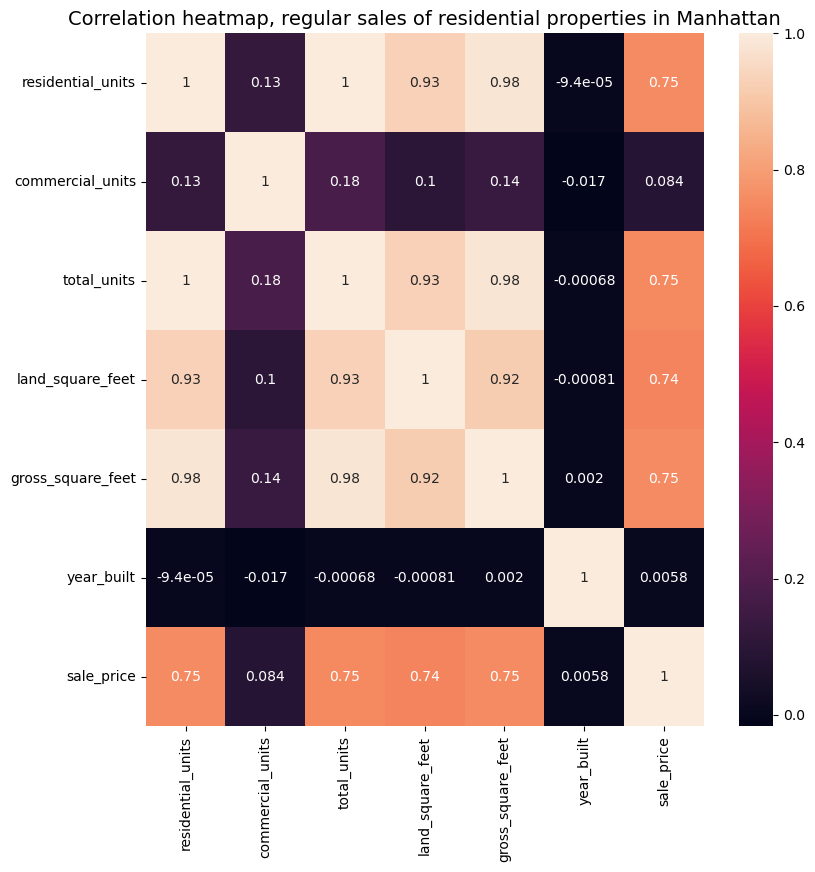

In [39]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df1regslresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, regular sales of residential properties in Manhattan', fontsize=14)

Sale prices of residential properties in Manhattan are strongly positively correlated with the number of residential and total units as well as with property size in land and gross square feet. The correlation with the year in which a property was built is weak, but still positive.

In [40]:
# Create subset with relevant columns
df1regslnresidsub = df1regslnresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, regular sales of non-residential properties in Manhattan')

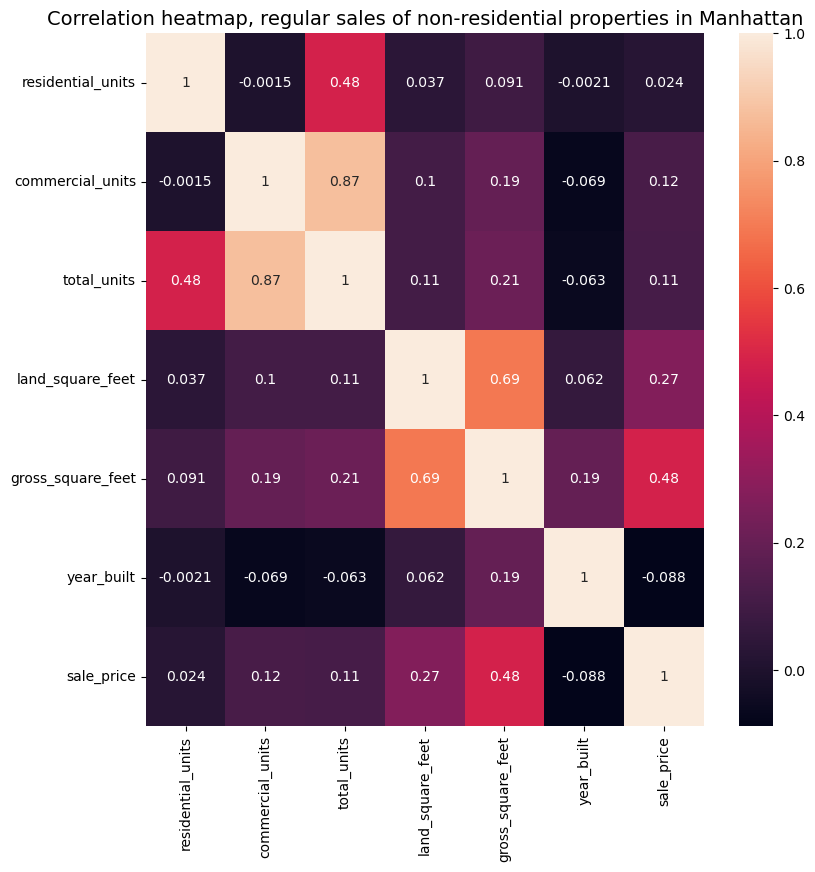

In [41]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df1regslnresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, regular sales of non-residential properties in Manhattan', fontsize=14)

There are no strong correlations between sale prices and other variables of non-residential properties in Manhattan. The only moderate positive relationship is one between sale prices and size in gross square feet. Besides this, there's a negative, but very weak correlation between sale prices and year built.

In [42]:
# Create subset with relevant columns
df1symslresidsub = df1symslresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, symbolic sales of residential properties in Manhattan')

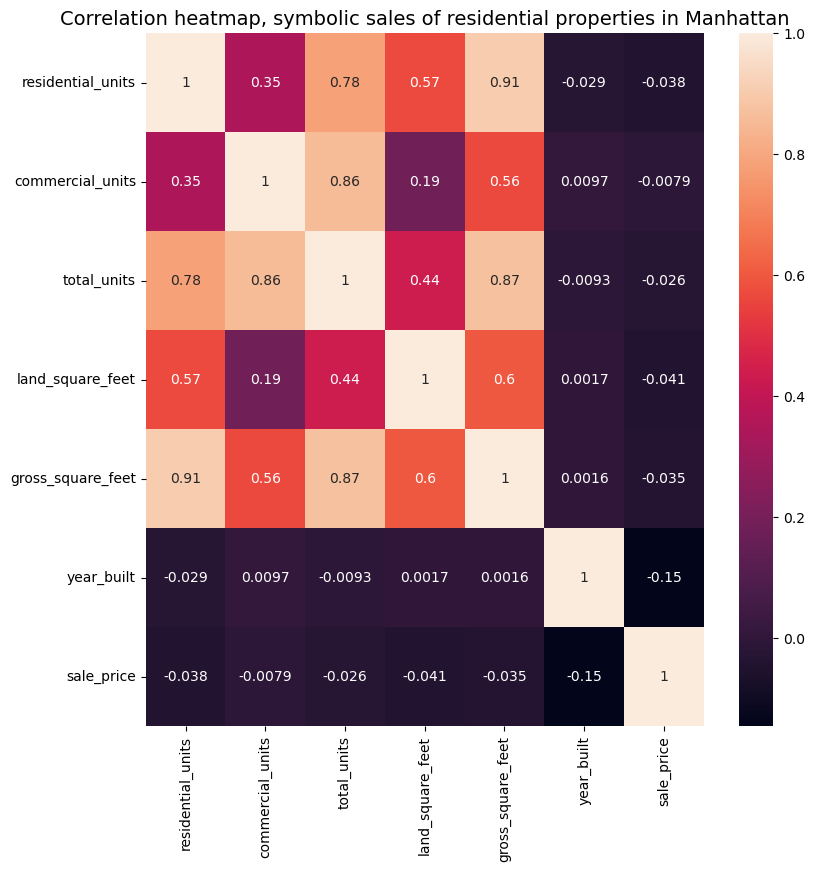

In [43]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df1symslresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, symbolic sales of residential properties in Manhattan', fontsize=14)

Prices of symbolic sales of residential properties in Manhattan are very weakly negatively correlated with the number of units of a property (residential, commertial, total units), its size (in land and gross square feet), and the year in which the property was built.

In [44]:
# Create subset with relevant columns
df1symslnresidsub = df1symslnresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, symbolic sales of non-residential properties in Manhattan')

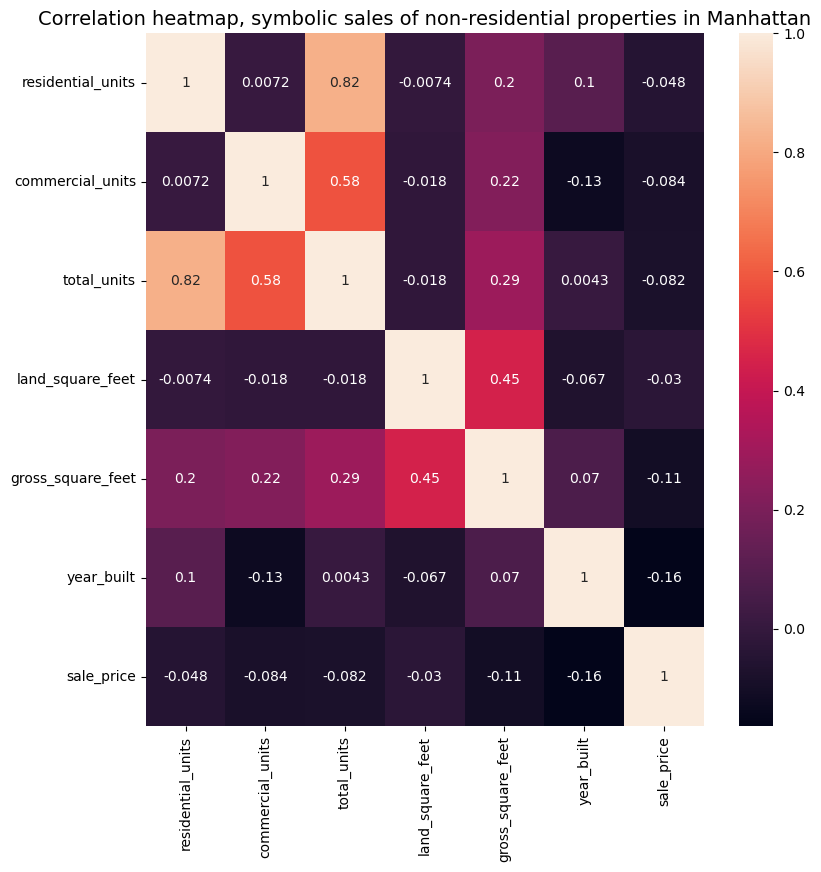

In [45]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df1symslnresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, symbolic sales of non-residential properties in Manhattan', fontsize=14)

Prices of symbolic sales of non-residential properties in Manhattan are also very weakly negatively correlated with the number of units of a property (residential, commertial, total units), its size (in land and gross square feet), and the year in which the property was built. 

Summary of results for Manhattan: 

The correlation heatmaps for regular sales in Manhattan indicate that there are positive relationships between sale prices and the number of units in a property and property size. For residential sales, these relationships are strong. For non-residential sales, they are weak to moderate.

## 06.2 Correlation heatmaps Bronx

In [46]:
# Create subset with relevant columns
df2regslresidsub = df2regslresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, regular sales of residential properties in the Bronx')

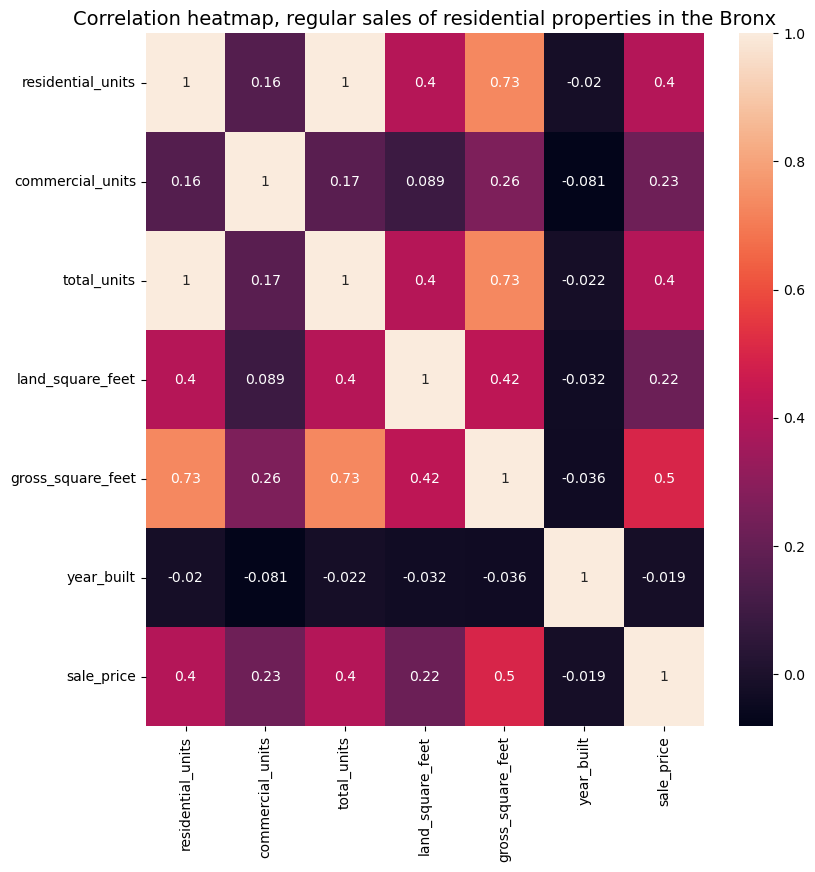

In [47]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df2regslresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, regular sales of residential properties in the Bronx', fontsize=14)

Sale prices of residential properties in the Bronx are moderately positively correlated with the number of residential and total units. They are weakly positively correlated with size in land square feet, but strongly positively correlated with size in gross square feet. The corrlation with the year in which a property was built is weak and negative which is a noteworthy difference to Manhattan where the relationship was equally weak, but positive.

In [48]:
# Create subset with relevant columns
df2regslnresidsub = df2regslnresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, regular sales of non-residential properties in the Bronx')

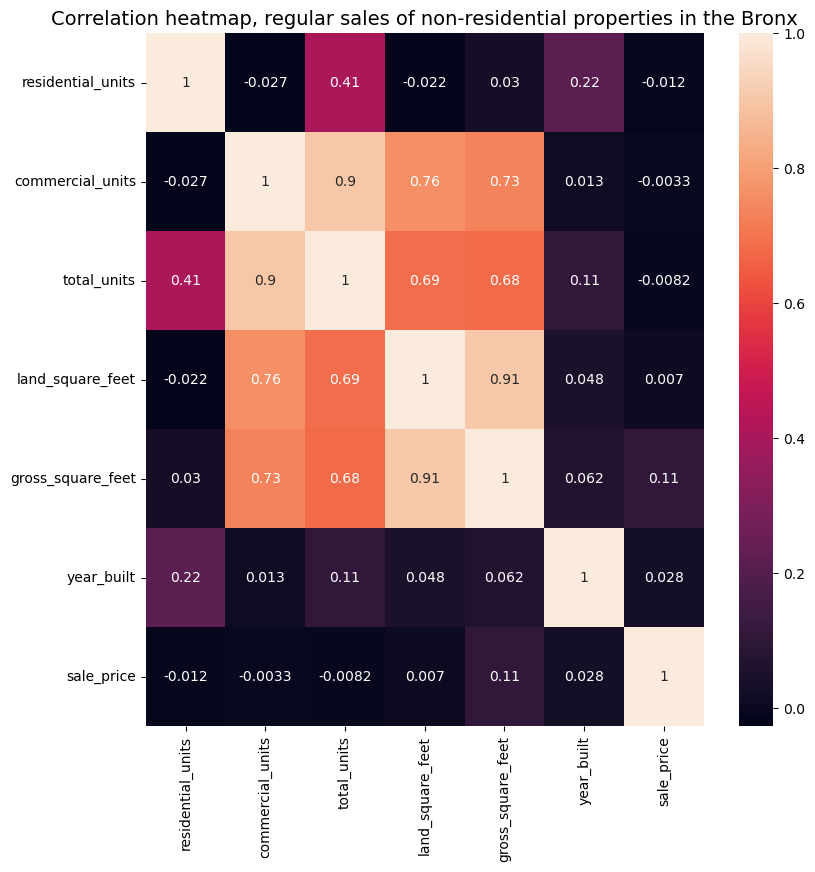

In [49]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df2regslnresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, regular sales of non-residential properties in the Bronx', fontsize=14)

Same as for Manhattan, there are no strong correlations between sale prices and other variables of non-residential properties in the Bronx. Still, it is noteworthy that the relationships between sale price and the number of units is negative whereas the relationships between sale prices and property size and age are positive. 

In [50]:
# Create subset with relevant columns
df2symslresidsub = df2symslresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, symbolic sales of residential properties in the Bronx')

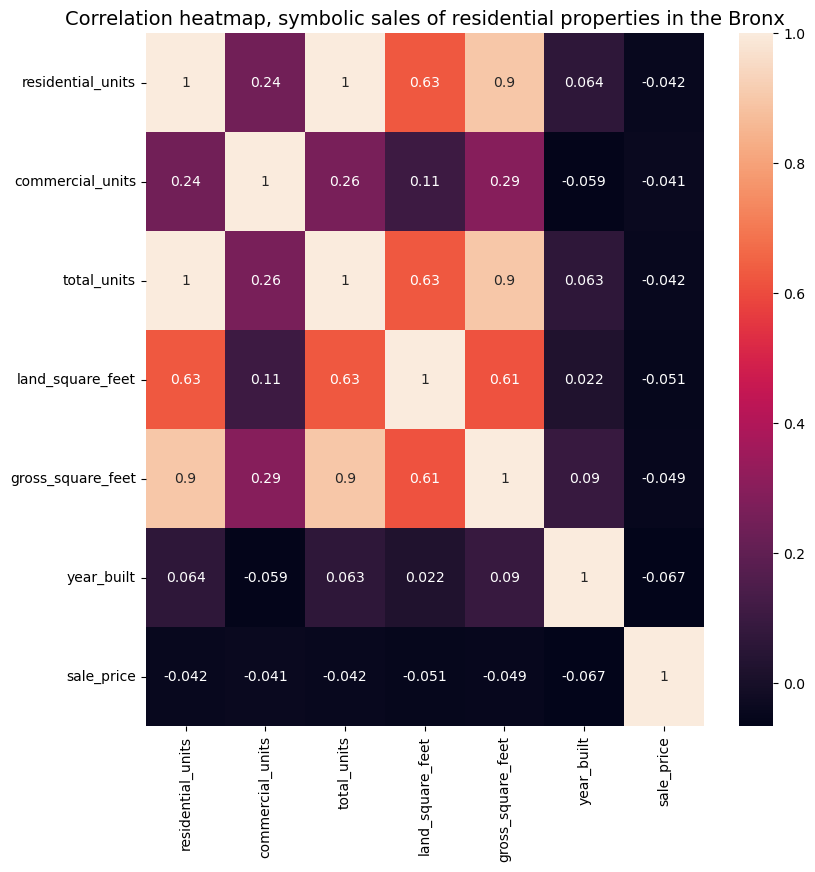

In [51]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df2symslresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, symbolic sales of residential properties in the Bronx', fontsize=14)

Prices of symbolic sales of residential properties in the Bronx are very weakly negatively correlated with the number of units of a property (residential, commertial, total units), its size (in land and gross square feet), and the year in which the property was built.

In [52]:
# Create subset with relevant columns
df2symslnresidsub = df2symslnresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, symbolic sales of non-residential properties in the Bronx')

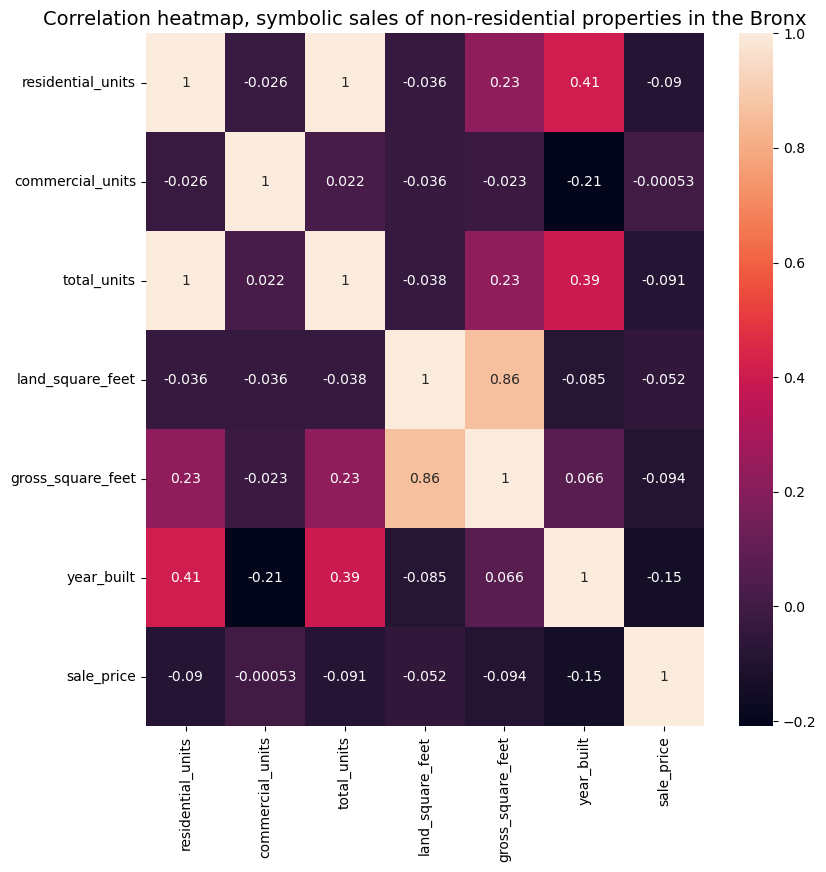

In [53]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df2symslnresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, symbolic sales of non-residential properties in the Bronx', fontsize=14)

Prices of symbolic sales of non-residential properties in the Bronx are very weakly negatively correlated with the number of units of a property (residential, commertial, total units) and its size (in land and gross square feet), and weakly negatively correlated with the year in which the property was built. 

Summary of results for the Bronx: 

The correlation heatmaps for regular sales in the Bronx point to interesting differences between residential and non-residential sales. For residential sales, prices are moderately to strongly positively correlated with the number of units and property size. For non-residential sales, the relationships between sale price and the number of units is very weakly negative whereas the relationships between sale prices and property size and age are (very) weakly positive. While this is a noteworthy difference to Manhattan, relationships for residential sales are stronger than those for non-residential sales in both boroughs.

## 06.3 Correlation heatmaps Brooklyn

In [54]:
# Create subset with relevant columns
df3regslresidsub = df3regslresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, regular sales of residential properties in Brooklyn')

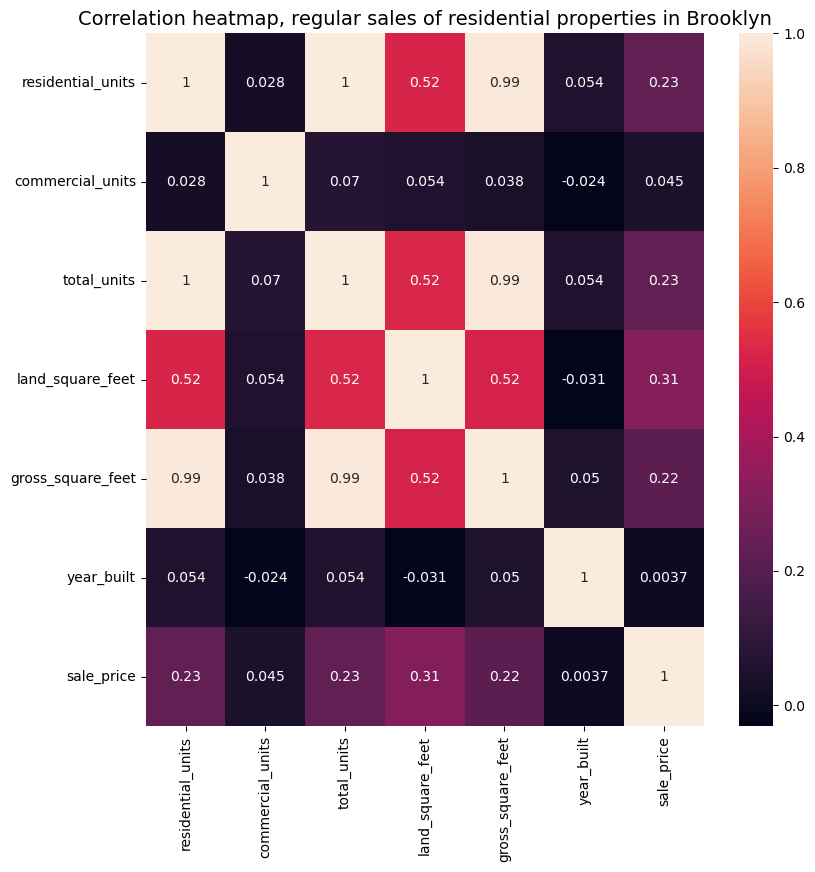

In [55]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df3regslresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, regular sales of residential properties in Brooklyn', fontsize=14)

Sale prices of residential properties in Brooklyn are weakly positively correlated with the number of residential and total units. Furthermore, they are moderately positively correlated with property size in land square feet and weakly positively correlated with size in gross square feet(i.e. exactly the other way around as for the Bronx). The relationship with property age is positive, but very weak (i.e. same as for Manhattan, but different from the Bronx). 

In [56]:
# Create subset with relevant columns
df3regslnresidsub = df3regslnresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, regular sales of non-residential properties in Brooklyn')

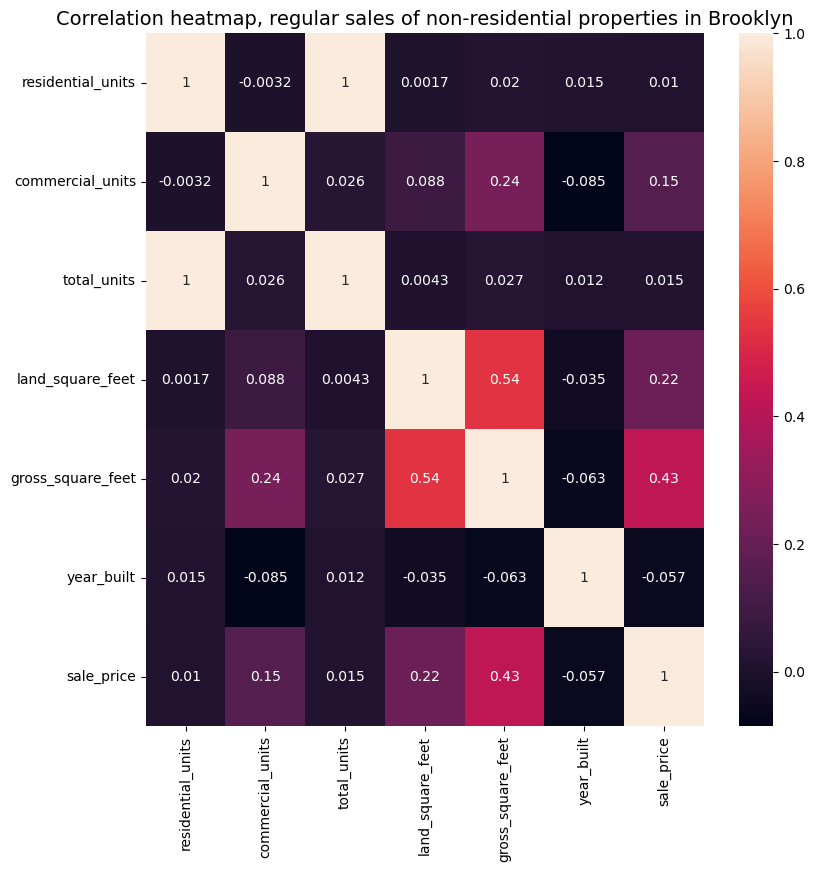

In [57]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df3regslnresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, regular sales of non-residential properties in Brooklyn', fontsize=14)

Similar to Manhattan, the moderately positive relationship between sale price and size in gross square feet stands out from among the other relationships which are all weak. The only negative relationship is between sale price and property age (same as for Manhattan, but different from the Bronx).

In [58]:
# Create subset with relevant columns
df3symslresidsub = df3symslresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, symbolic sales of residential properties in Brooklyn')

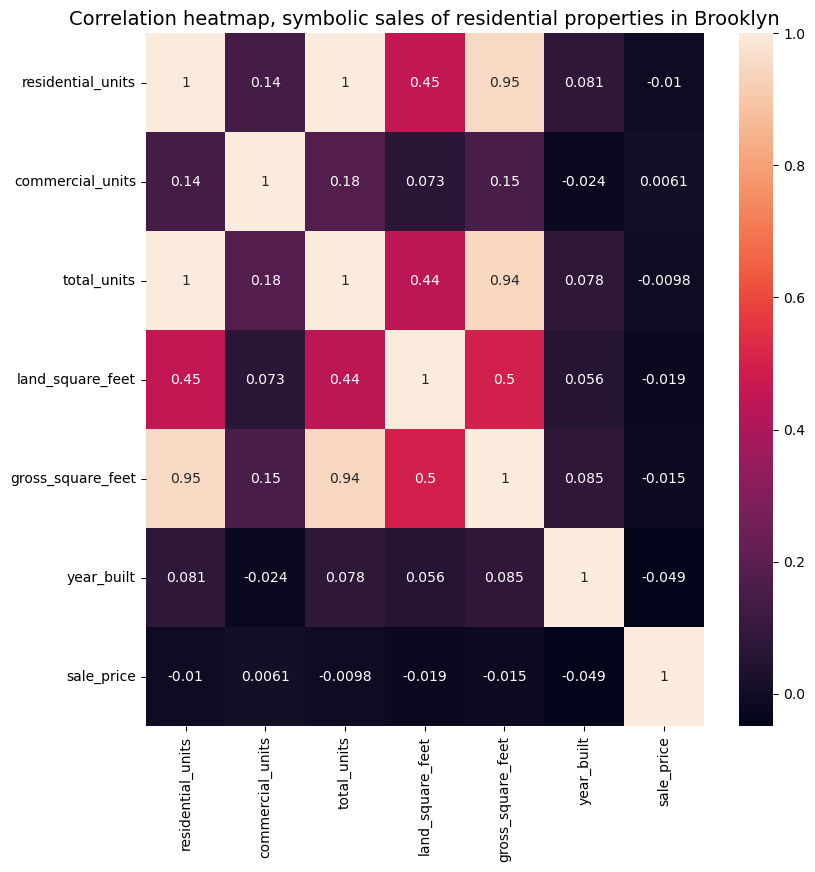

In [59]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df3symslresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, symbolic sales of residential properties in Brooklyn', fontsize=14)

Prices of symbolic sales of residential properties in Brooklyn are very weakly positively correlated with the number of commercial units, but very weakly negatively correlated with all other variables. 

In [60]:
# Create subset with relevant columns
df3symslnresidsub = df3symslnresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, symbolic sales of non-residential properties in Brooklyn')

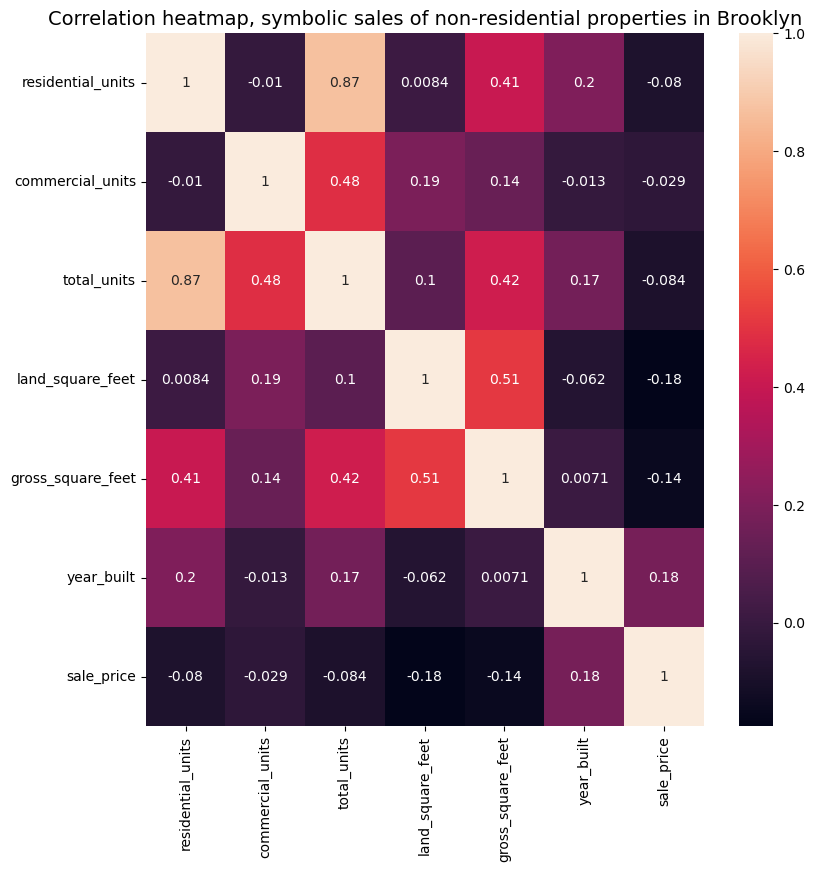

In [61]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df3symslnresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, symbolic sales of non-residential properties in Brooklyn', fontsize=14)

Prices of symbolic sales of non-residential properties in Brooklyn are very weakly negatively correlated with the number of units, weakly negatively correlated with property size, and weakly positively correlated with propery age. 

Summary of results for Brooklyn: 

The picture for Brookly is similar to the one for Manhattan: The correlation heatmaps for regular sales in Manhattan indicate that there are positive relationships between sale prices and the number of units in a property and property size. For residential sales, these relationships are stronger than for non-residential ones though all of these relationships qualify as weak to moderate only.

## 06.4 Correlation heatmaps Queens

In [62]:
# Create subset with relevant columns
df4regslresidsub = df4regslresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, regular sales of residential properties in Queens')

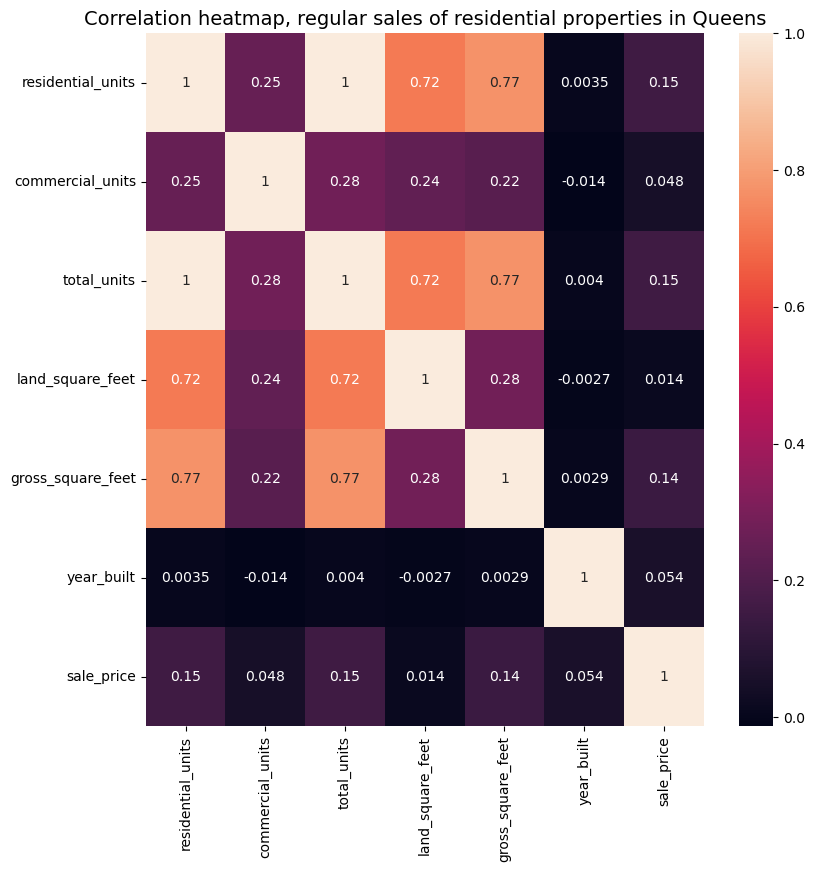

In [63]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df4regslresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, regular sales of residential properties in Queens', fontsize=14)

Sale prices of residential properties in Queens are weakly positively correlated with the number of residential and total units. Furthermore they are very weakly positively correlated with size in land square feet and weakly positively correlated with size in gross square feet. The relationship with property age is positive, but very weak (i.e. same as for Manhattan and Brooklyn, but different from the Bronx). 

In [64]:
# Create subset with relevant columns
df4regslnresidsub = df4regslnresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, regular sales of non-residential properties in Queens')

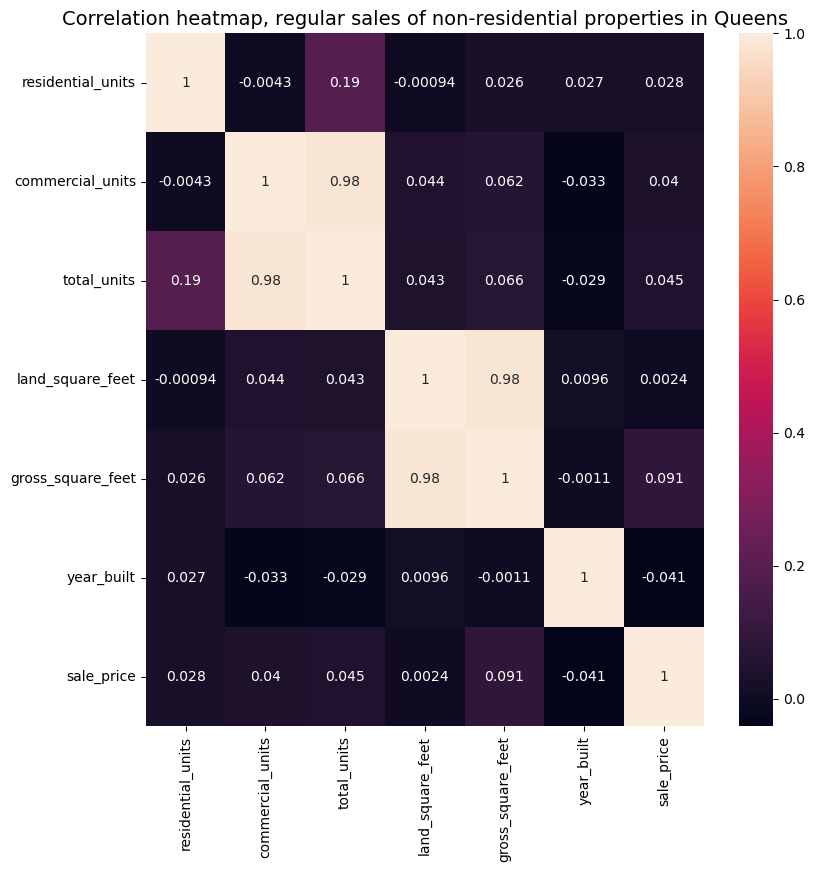

In [65]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df4regslnresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, regular sales of non-residential properties in Queens', fontsize=14)

Different from Manhattan and Brooklyn, there are no relationships between sale price and any other variables of noteworthy strength for regular non-residental sales Queens. All relationships are very weak and positive except from the one with age with is very weakly negative (i.e. the same as for Manhattan and Brooklyn, but different from the Bronx).

In [66]:
# Create subset with relevant columns
df4symslresidsub = df4symslresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, symbolic sales of residential properties in Queens')

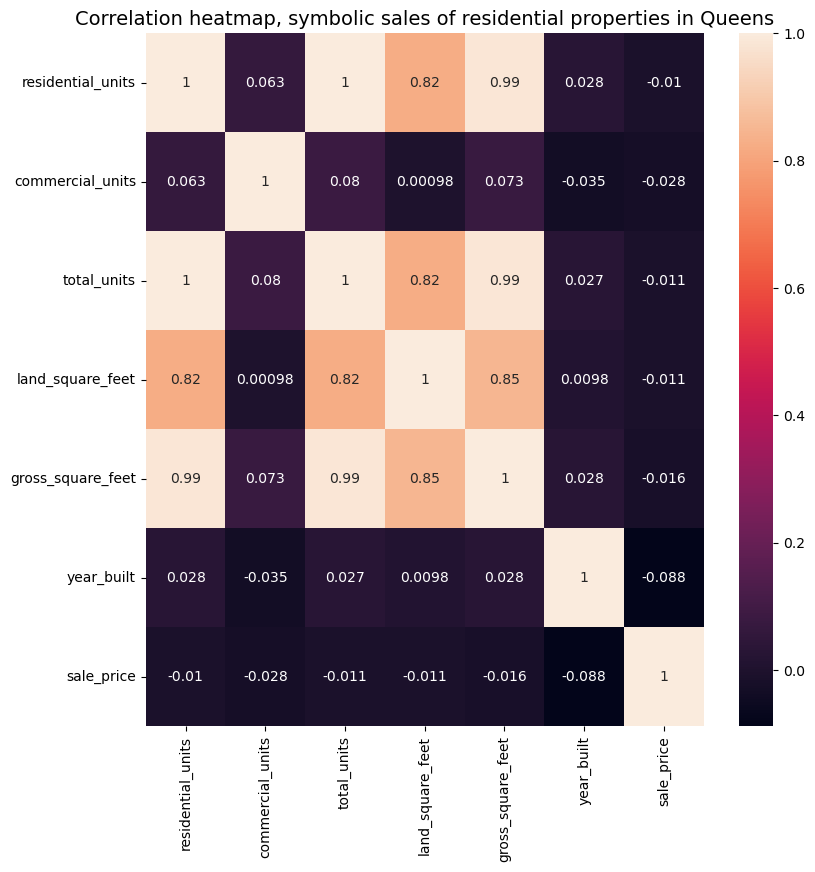

In [67]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df4symslresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, symbolic sales of residential properties in Queens', fontsize=14)

Prices of symbolic sales of residential properties in Queens are very weakly negatively correlated with all other variables. 

In [68]:
# Create subset with relevant columns
df4symslnresidsub = df4symslnresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, symbolic sales of non-residential properties in Queens')

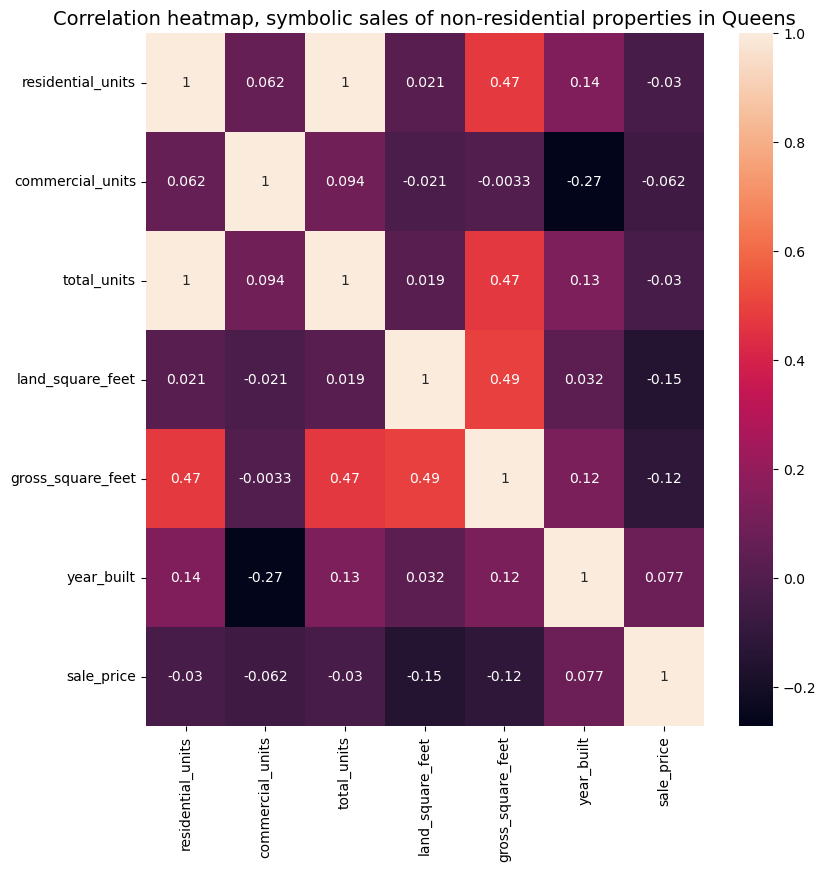

In [69]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df4symslnresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, symbolic sales of non-residential properties in Queens', fontsize=14)

The picture for prices of symbolic sales of non-residential properties in Queens is very similar to the picture for Brooklyn: prices are very weakly negatively correlated with the number of units, weakly negatively correlated with property size, and very weakly positively correlated with propery age. 

Summary of results for Queens: 

While the picture for Queens is on the one hand similar to Manhattan and Brooklyn in the sense that relationships for residential sales are stronger than ones for non-residential sales, it is different in the sense that there are no relationships of noteworthy strenght for non-residential sales. 
After having looked at four out of five boroughs, the Bronx remains the only borough where the relationship between sale price and property age is negative for residential sales.

## 06.5 Correlation heatmaps Staten Island

In [70]:
# Create subset with relevant columns
df5regslresidsub = df5regslresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, regular sales of residential properties in Staten Island')

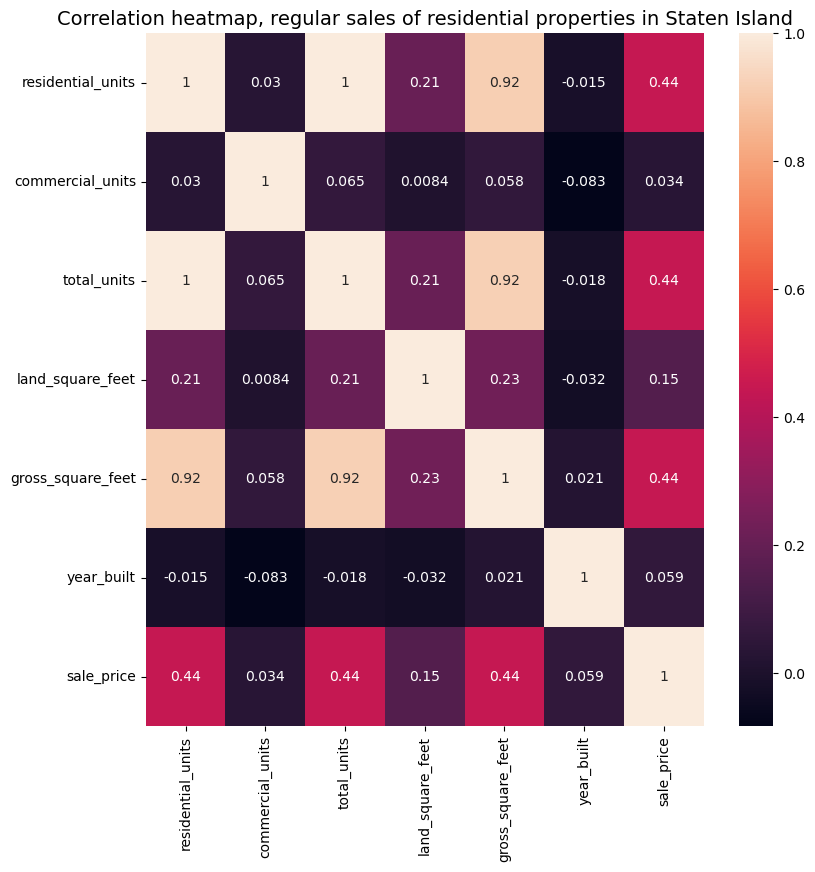

In [71]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df5regslresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, regular sales of residential properties in Staten Island', fontsize=14)

Sale prices of residential properties in Staten Island are moderately positively correlated with the number of residential and total units. Furthermore they are weakly positively correlated with size in land square feet and moderately positively correlated with size in gross square feet. The relationship with property age is positive, but very weak (i.e. same as for Manhattan, Brooklyn and Queens, but different from the Bronx). 

In [72]:
# Create subset with relevant columns
df5regslnresidsub = df5regslnresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, regular sales of non-residential properties in Staten Island')

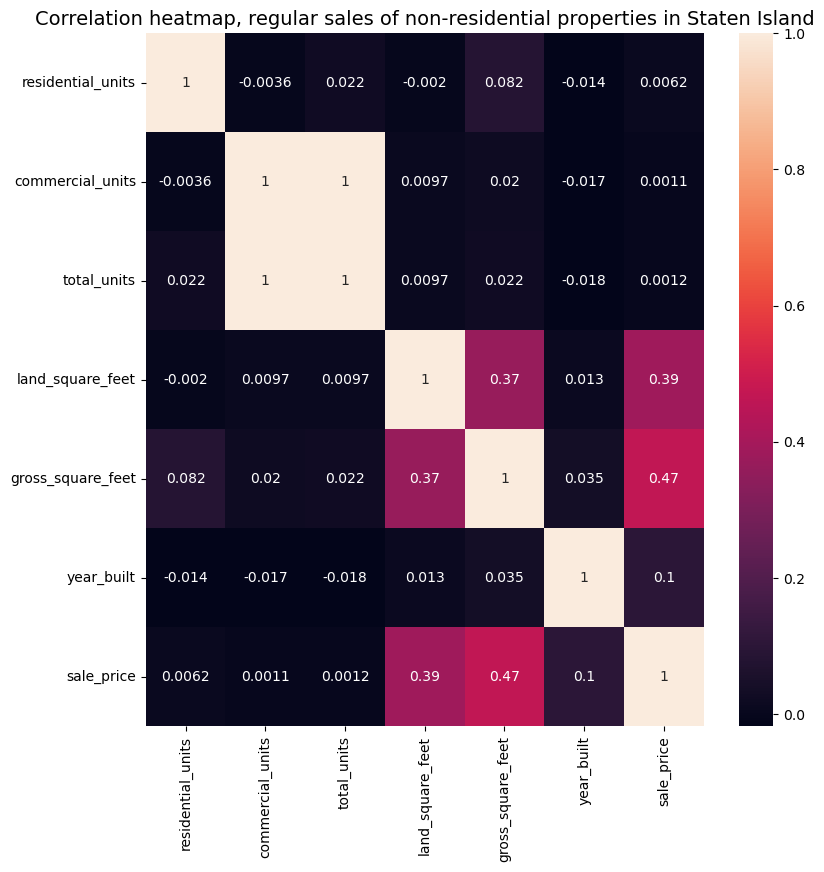

In [73]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df5regslnresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, regular sales of non-residential properties in Staten Island', fontsize=14)

While the relationsships between price and number of units are positive, but not of noteworthy strength for regular non-residential sales in Staten Island, the relationships between price and size in land and gross square feet are both moderately positive which makes Staten Island stand out among the boroughs. The relationship between price and age is weak, but positive (i.e. same as for the Bronx, but different from Manhattan, Brookly and Queens).

In [74]:
# Create subset with relevant columns
df5symslresidsub = df5symslresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, symbolic sales of residential properties in Staten Island')

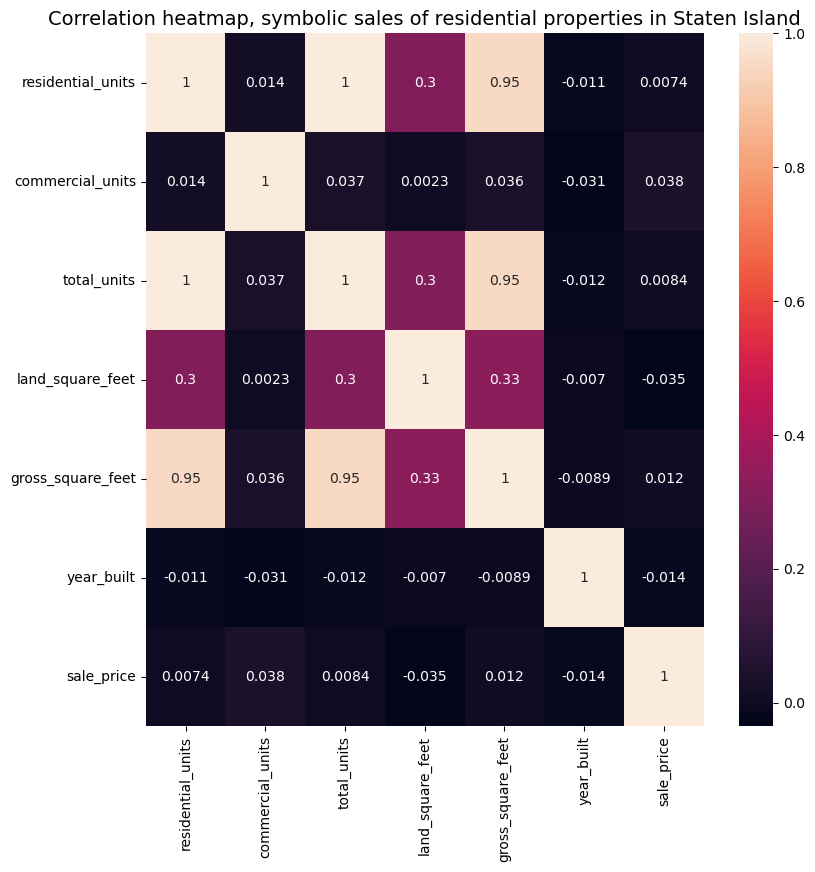

In [75]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df5symslresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, symbolic sales of residential properties in Staten Island', fontsize=14)

Prices of symbolic sales of residential properties in Staten Island are very weakly positively correlated the number of units and size in gross square feet, and very weakly negatively correlated with size in land square feet and property age. 

In [76]:
# Create subset with relevant columns
df5symslnresidsub = df5symslnresid[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

Text(0.5, 1.0, 'Correlation heatmap, symbolic sales of non-residential properties in Staten Island')

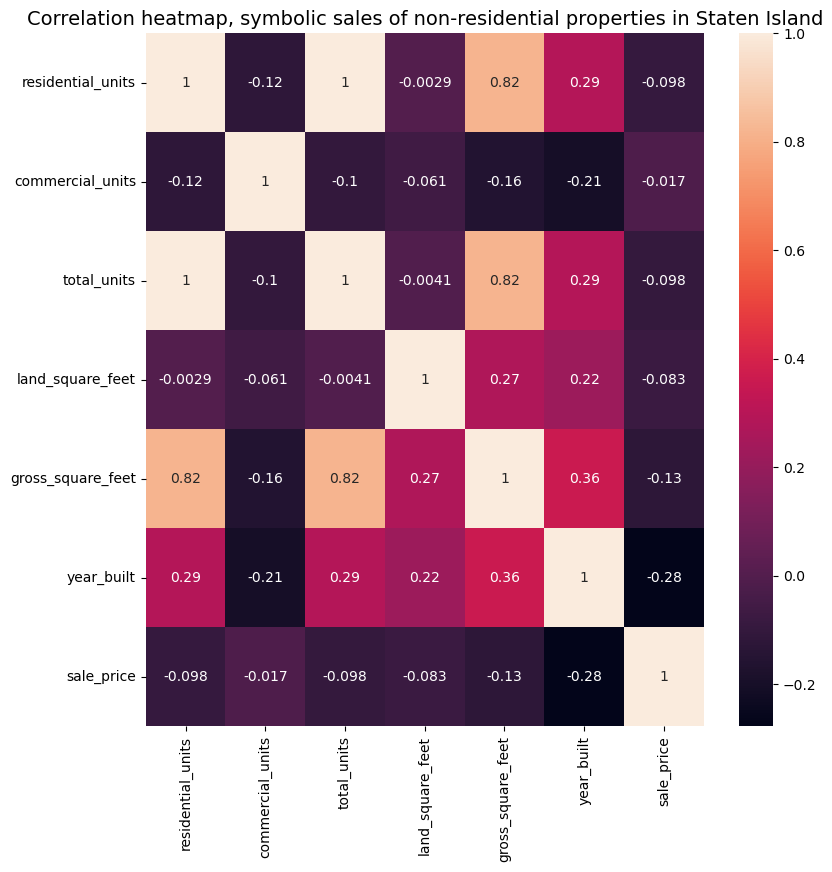

In [77]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(df5symslnresidsub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap, symbolic sales of non-residential properties in Staten Island', fontsize=14)

Prices of symbolic sales of non-residential properties in Staten Island are very weakly to weakly negatively correlated with all other variables.

Summary of results for Staten Island:

The picture for Staten Island differs from the one of all other boroughs since relationships for residential sales are not generally stronger than ones for non-residential sales in Staten Island. There are moderate positive relationships between sale price and property size for both residential and non-residential sales.
After having looked at all five boroughs, the Bronx remains the only borough where the relationship between sale price and property age is negative for residential sales. However, there's one similarity which the Bronx and Staten Island share: the relationship between price and age for non-residential sales is weak, but positive.

General observation on property size:
The results for differing (i.e. positive and negative) correlations for size in land and gross square feet indicate that there might be some inconsistency or even flaws in the data. The variables for property size will be explored further, but results must be interpreted cautiously.

Relationships that merit a closer look because the qualify as strong:
- prices of residential sales in Manhattan and total number of units
- prices of residential sales in Manhattan and property size in gross square feet
- prices of residential sales in the Bronx and property size in gross square feet

## 06.6 Scatterplot of prices and total number of units for residential sales in Manhattan

Text(0.5, 1.0, 'Relation between sale price and total number of units')

<Figure size 1000x1000 with 0 Axes>

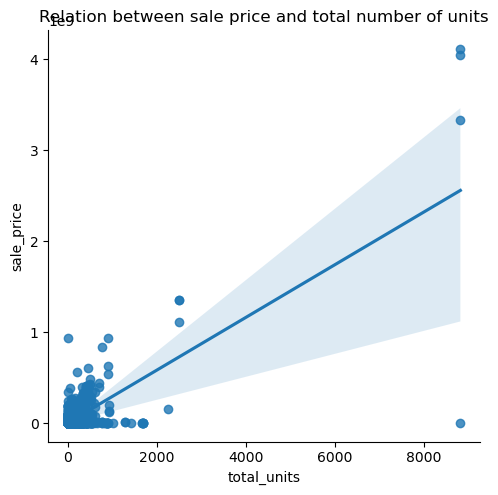

In [78]:
# Adapt figure size
f = plt.figure(figsize=(10,10))

# How does total_units affect sale_price
sns.lmplot(data=df1regslresid, x='total_units', y='sale_price')

# Add a title
plt.title('Relation between sale price and total number of units')

## 06.7 Scatterplot of prices and property size for residential sales in Manhattan

Text(0.5, 1.0, 'Relation between sale price and property size')

<Figure size 1000x1000 with 0 Axes>

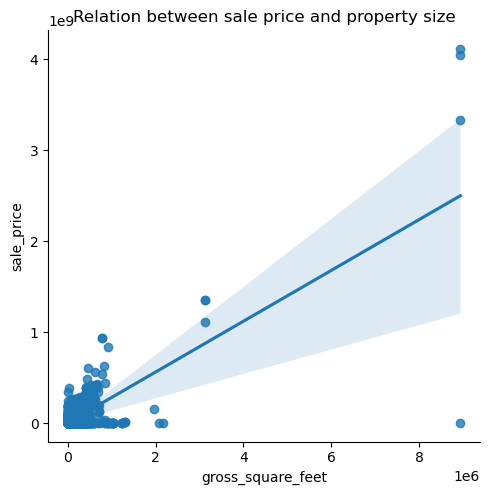

In [79]:
# Adapt figure size
f = plt.figure(figsize=(10,10))

# How does property size in gross square feet affect sale_price
sns.lmplot(data=df1regslresid, x='gross_square_feet', y='sale_price')

# Add a title
plt.title('Relation between sale price and property size')

## 06.8 Scatterplot of prices and property size for residential sales in the Bronx

Text(0.5, 1.0, 'Relation between sale price and property size')

<Figure size 1000x1000 with 0 Axes>

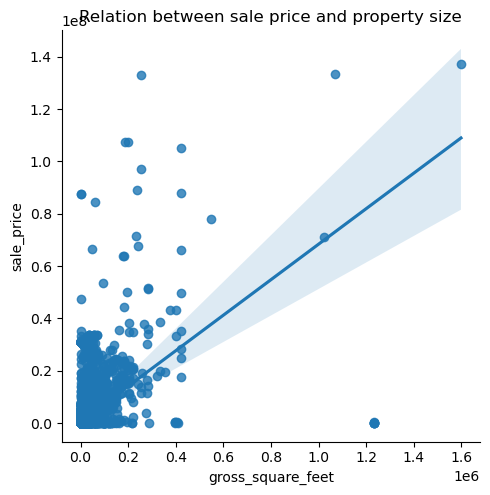

In [80]:
# Adapt figure size
f = plt.figure(figsize=(10,10))

# How does property size in gross square feet affect sale_price
sns.lmplot(data=df2regslresid, x='gross_square_feet', y='sale_price')

# Add a title
plt.title('Relation between sale price and property size')

The three scatterplots show that despite the strong relationships that were identified, variance is very high in all cases. Most observations fall far outside the linear trend line. Furthermore, the scatterplots show that most observations lie very close to each other and can't be explained with a linear relation even if outliers of very high prices were excluded. Exploring the data further through linear regression analysis is therefore not considered fruitful. Instead, cluster analysis and time series analysis will be carried out.

# 07 Cluster analysis

A previous cluster analysis has shown that cluster analysis only yields useful results to form price clusters if ownership transfers are excluded and property age is not taken into account when carrying out the cluster analysis. To test whether meaningful price clusters can be formed when excluding ownership transfers and symbolic sales, but taking property age into account, the basis for the ensuing cluster analysis will be regular sales of residential and non-residential properties in all five boroughs (i.e ownership transfers and sales with a maximum price of 1111 US Dollars will be excluded). If the results do not prove useful, the cluster analysis process will instead be repeated on all sales except ownership transfers while omitting property age in order to form meaningful price clusters.

## 07.1 Data pre-processing I

In [81]:
# Check dimensions of full dataset
df.shape

(1665722, 14)

In [82]:
# Check number of regular sales in full dataset
df['sale_or_transfer'].value_counts()

regular sale          1160651
ownership transfer     483934
symbolic sale           21137
Name: sale_or_transfer, dtype: int64

In [83]:
# Creating basis for cluster analysis
df_cluster = df.loc[df['sale_or_transfer'] == 'regular sale']

In [84]:
# Check dimensions of dataset for cluster analysis
df_cluster.shape

(1160651, 14)

In [85]:
# Get datatypes in dataset for cluster analysis
df_cluster.dtypes

borough_code                              object
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale                 object
building_class_at_time_of_sale            object
sale_price                               float64
sale_date                         datetime64[ns]
sale_or_transfer                          object
borough_name                              object
resid_or_non-resid                        object
dtype: object

In [86]:
# Drop non-numerical columns

# Create list of columns to drop 
drop_cols = ['borough_code', 'tax_class_at_time_of_sale', 'building_class_at_time_of_sale', 'sale_date', 'sale_or_transfer', 'borough_name', 'resid_or_non-resid']

# Drop non-numerical columns
df_cluster_num = df_cluster.drop(columns = drop_cols)

# Get dimensions of df_cluster_num
df_cluster_num.shape

(1160651, 7)

In [87]:
# Get descriptive stats of df_cluster_num
df_cluster_num.describe()

residential_units  commercial_units   total_units  land_square_feet  \
count       1.160651e+06      1.160651e+06  1.160651e+06      1.160651e+06   
mean        2.270695e+00      1.941910e-01  2.471136e+00      3.385594e+03   
std         3.132945e+01      7.293000e+00  3.226441e+01      2.887793e+05   
min         0.000000e+00      0.000000e+00  0.000000e+00      0.000000e+00   
25%         0.000000e+00      0.000000e+00  1.000000e+00      0.000000e+00   
50%         1.000000e+00      0.000000e+00  1.000000e+00      1.975000e+03   
75%         2.000000e+00      0.000000e+00  2.000000e+00      2.589000e+03   
max         2.081100e+04      4.964000e+03  2.081100e+04      2.147557e+08   

       gross_square_feet    year_built    sale_price  
count       1.160651e+06  1.160651e+06  1.160651e+06  
mean        3.841058e+03  1.949958e+03  1.354533e+06  
std         3.911195e+04  3.375446e+01  1.386233e+07  
min         0.000000e+00  1.648000e+03  1.115000e+03  
25%         0.000000e+00  1.925000e+03  3.250000e+05  
50%         1.346000e+03  1.945000e+03  5.300000e+05  
75%         2.160000e+03  1.970000e+03  8.690000e+05  
max         1.496215e+07  2.022000e+03  4.111112e+09

In [88]:
# Normalise data (due to skew known from previous data exploration)

# Create normalisation object
scaler = MinMaxScaler()

# Fit dataframe onto object
df_cluster_norm = pd.DataFrame(scaler.fit_transform(df_cluster_num), columns=df_cluster_num.columns, index=df_cluster_num.index)

# Print normalised dataframe
print(df_cluster_norm)

         residential_units  commercial_units  total_units  land_square_feet  \
0                 0.000048               0.0     0.000048          0.000017   
1                 0.000048               0.0     0.000048          0.000036   
3                 0.000048               0.0     0.000048          0.000038   
5                 0.000048               0.0     0.000048          0.000028   
6                 0.000048               0.0     0.000048          0.000029   
...                    ...               ...          ...               ...   
1916221           0.000048               0.0     0.000048          0.000009   
1916225           0.000048               0.0     0.000048          0.000009   
1916243           0.000048               0.0     0.000048          0.000009   
1916245           0.000048               0.0     0.000048          0.000009   
1916253           0.000048               0.0     0.000048          0.000009   

         gross_square_feet  year_built  sale_price 

In [89]:
# Inspect head of normalised dataframe
df_cluster_norm.head()

residential_units  commercial_units  total_units  land_square_feet  \
0           0.000048               0.0     0.000048          0.000017   
1           0.000048               0.0     0.000048          0.000036   
3           0.000048               0.0     0.000048          0.000038   
5           0.000048               0.0     0.000048          0.000028   
6           0.000048               0.0     0.000048          0.000029   

   gross_square_feet  year_built  sale_price  
0           0.000061    0.946524    0.000186  
1           0.000152    0.887701    0.000267  
3           0.000102    0.860963    0.000216  
5           0.000217    0.911765    0.000255  
6           0.000172    0.874332    0.000221

In [90]:
# Identify number of clusters

# Define range of potential number of clusters
num_clusters = range(1,10)

# Define k-means clusters within range
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

# Apply k-means algorithm to get score list
score = [kmeans[i].fit(df_cluster_norm).score(df_cluster_norm) for i in range(len(kmeans))]

# Print score list
print(score)

[-9485.258551084073, -2808.175501118659, -1026.1173182774833, -612.9242767157818, -426.2789713028156, -321.09144220151234, -259.14215502193804, -211.50653955687417, -172.7368915269998]


Text(0, 0.5, 'Score')

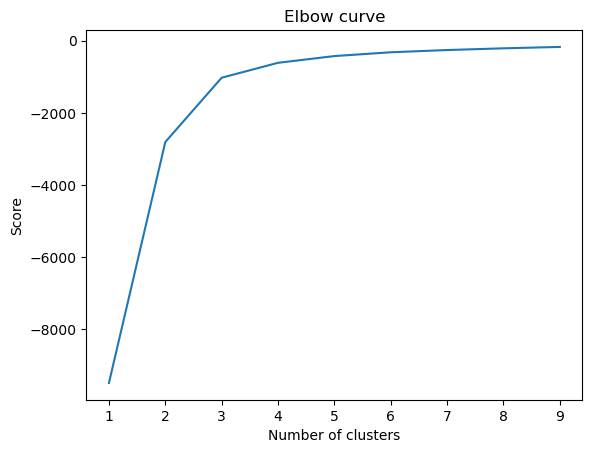

In [91]:
# Plot elbow curve

# Create plot
pl.plot(num_clusters, score)

# Add axis labels and title
pl.title('Elbow curve')
pl.xlabel('Number of clusters')
pl.ylabel('Score')

The number of clusters will be set to 3 as the curve flattens significantly from 3 clusters onwards.

## 07.2 k-means clustering I

In [92]:
# Create k-means object
kmeans = KMeans(n_clusters=3)

# Fit k-means object onto dataframe
kmeans.fit(df_cluster_norm)

KMeans(n_clusters=3)

In [93]:
# Create new column indicating cluster
df_cluster_norm['cluster'] = kmeans.fit_predict(df_cluster_norm)

In [94]:
# Check addition of new column
df_cluster_norm.head(10)

residential_units  commercial_units  total_units  land_square_feet  \
0            0.000048               0.0     0.000048          0.000017   
1            0.000048               0.0     0.000048          0.000036   
3            0.000048               0.0     0.000048          0.000038   
5            0.000048               0.0     0.000048          0.000028   
6            0.000048               0.0     0.000048          0.000029   
7            0.000048               0.0     0.000048          0.000012   
9            0.000048               0.0     0.000048          0.000012   
10           0.000048               0.0     0.000048          0.000011   
11           0.000048               0.0     0.000048          0.000012   
13           0.000048               0.0     0.000048          0.000007   

    gross_square_feet  year_built  sale_price  cluster  
0            0.000061    0.946524    0.000186        1  
1            0.000152    0.887701    0.000267        1  
3            0.000102    0.860963    0.000216        0  
5            0.000217    0.911765    0.000255        1  
6            0.000172    0.874332    0.000221        0  
7            0.000051    0.754011    0.000104        2  
9            0.000041    0.713904    0.000061        2  
10           0.000088    0.903743    0.000133        1  
11           0.000167    0.903743    0.000185        1  
13           0.000102    0.903743    0.000146        1

In [95]:
# Count number of observations per cluster
df_cluster_norm['cluster'].value_counts(dropna=False)

2    514273
0    389580
1    256798
Name: cluster, dtype: int64

In [96]:
# Add cluster column to basis basis for cluster analysis for cluster analysis

# Extract cluster column
extracted_col = df_cluster_norm['cluster']

# Add extracted column to basis
df_cluster = df_cluster.join(extracted_col)

# Print head of df
df_cluster.head()

borough_code  residential_units  commercial_units  total_units  \
0            5                  1                 0            1   
1            5                  1                 0            1   
3            5                  1                 0            1   
5            5                  1                 0            1   
6            5                  1                 0            1   

   land_square_feet  gross_square_feet  year_built tax_class_at_time_of_sale  \
0            3654.0              910.0        2002                         1   
1            7654.0             2277.0        1980                         1   
3            8190.0             1528.0        1970                         1   
5            5999.0             3250.0        1989                         1   
6            6200.0             2580.0        1975                         1   

  building_class_at_time_of_sale  sale_price  sale_date sale_or_transfer  \
0                             A5    764000.0 2022-06-30     regular sale   
1                             A1   1098000.0 2022-08-19     regular sale   
3                             A2    890000.0 2022-01-03     regular sale   
5                             A1   1050000.0 2022-08-31     regular sale   
6                             A1    910000.0 2022-04-05     regular sale   

    borough_name resid_or_non-resid  cluster  
0  Staten Island        residential        1  
1  Staten Island        residential        1  
3  Staten Island        residential        0  
5  Staten Island        residential        1  
6  Staten Island        residential        0

In [97]:
# Add cluster column to full dataframe

# Add extracted column to full df
df = df.join(extracted_col)

# Print head of df
df.head(5)

borough_code  residential_units  commercial_units  total_units  \
0            5                  1                 0            1   
1            5                  1                 0            1   
3            5                  1                 0            1   
5            5                  1                 0            1   
6            5                  1                 0            1   

   land_square_feet  gross_square_feet  year_built tax_class_at_time_of_sale  \
0            3654.0              910.0        2002                         1   
1            7654.0             2277.0        1980                         1   
3            8190.0             1528.0        1970                         1   
5            5999.0             3250.0        1989                         1   
6            6200.0             2580.0        1975                         1   

  building_class_at_time_of_sale  sale_price  sale_date sale_or_transfer  \
0                             A5    764000.0 2022-06-30     regular sale   
1                             A1   1098000.0 2022-08-19     regular sale   
3                             A2    890000.0 2022-01-03     regular sale   
5                             A1   1050000.0 2022-08-31     regular sale   
6                             A1    910000.0 2022-04-05     regular sale   

    borough_name resid_or_non-resid  cluster  
0  Staten Island        residential      1.0  
1  Staten Island        residential      1.0  
3  Staten Island        residential      0.0  
5  Staten Island        residential      1.0  
6  Staten Island        residential      0.0

In [98]:
# Count values for column cluster in basis dataframe
df_cluster['cluster'].value_counts(dropna=False)

2    514273
0    389580
1    256798
Name: cluster, dtype: int64

In [99]:
# Count values for column cluster in full dataframe
df['cluster'].value_counts(dropna=False)

2.0    514273
NaN    505071
0.0    389580
1.0    256798
Name: cluster, dtype: int64

In [100]:
# Fill nan values in column cluster in full dataframe
df.loc[df['sale_or_transfer'] == 'ownership transfer', 'cluster'] = 'ownership transfer'
df.loc[df['sale_or_transfer'] == 'symbolic sale', 'cluster'] = 'symbolic sale'

In [101]:
# Count values for column cluster in full dataframe
df['cluster'].value_counts(dropna=False)

2.0                   514273
ownership transfer    483934
0.0                   389580
1.0                   256798
symbolic sale          21137
Name: cluster, dtype: int64

## 07.3 Visualise clustered data I

Text(0, 0.5, 'Sale price')

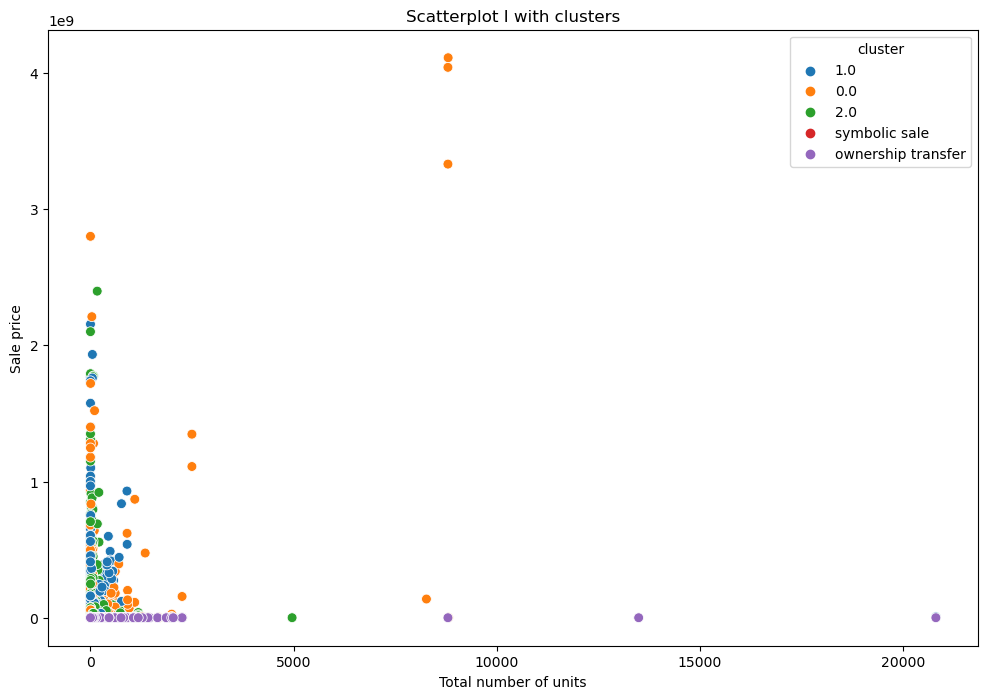

In [102]:
# Scatterplot of total_units and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_units'], y=df['sale_price'], hue=df['cluster'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot I with clusters')
plt.xlabel('Total number of units')
plt.ylabel('Sale price')

Text(0, 0.5, 'Sale price')

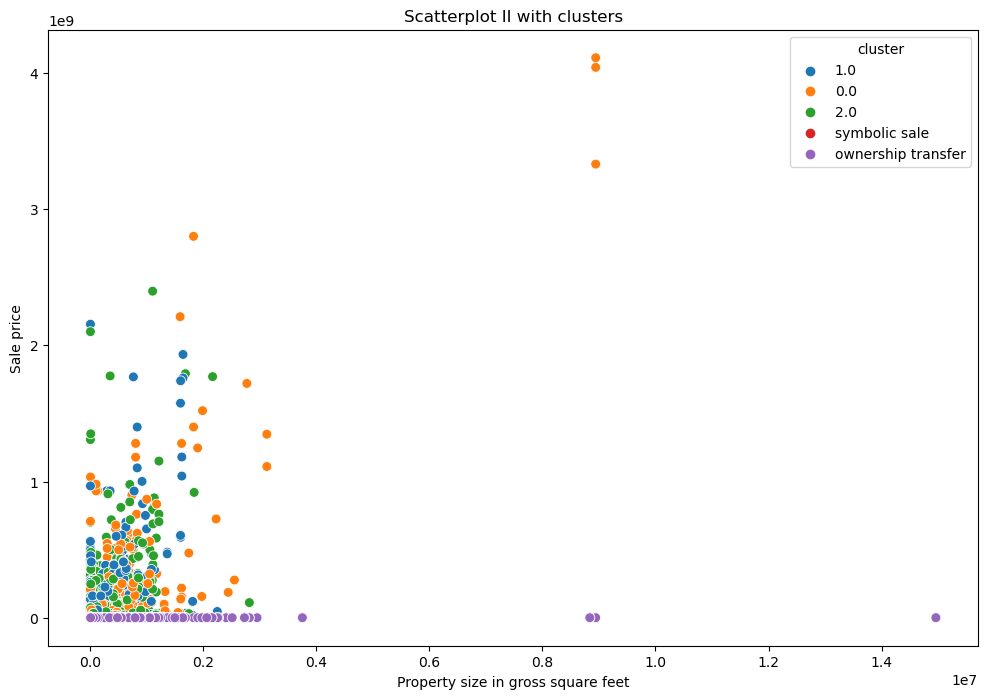

In [103]:
# Scatterplot of gross_square_feet and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['gross_square_feet'], y=df['sale_price'], hue=df['cluster'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot II with clusters')
plt.xlabel('Property size in gross square feet')
plt.ylabel('Sale price')

Text(0, 0.5, 'Sale price')

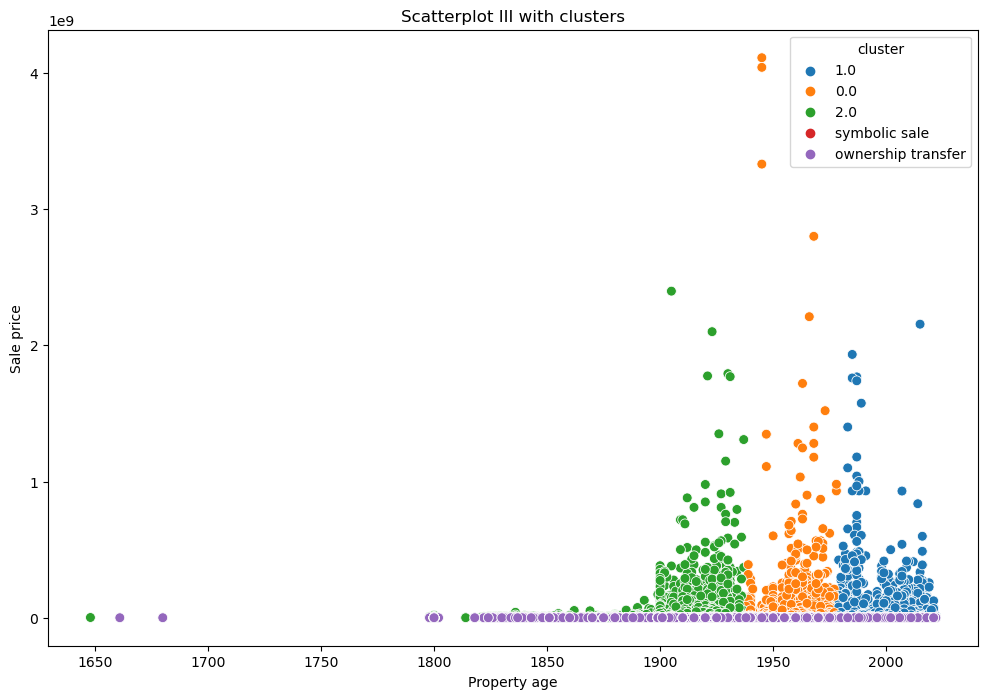

In [104]:
# Scatterplot of year_built and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['year_built'], y=df['sale_price'], hue=df['cluster'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot III with clusters')
plt.xlabel('Property age')
plt.ylabel('Sale price')

The only way in which the data can be meaningfully clustered is by age. It is therefore not useful to keep the values 'ownership transfer' and 'symbolic sale' in the cluster column. 

To check whether the picture remains the same when including ownership transfers and symbolic sales, the cluster analysis is carried out a second time with those types of sales included. If the picture is confirmed, an age cluster column will be properly derived. 

After that, a third cluster analysis will be run on all observations except for ownership transfers and omitting propery age in order to again form price clusters that were identified in a previous cluster analysis.

## 07.4 Data pre-processing II

In [105]:
# Check dimensions of full dataset
df.shape

(1665722, 15)

In [106]:
# Get datatypes in full dataset
df.dtypes

borough_code                              object
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale                 object
building_class_at_time_of_sale            object
sale_price                               float64
sale_date                         datetime64[ns]
sale_or_transfer                          object
borough_name                              object
resid_or_non-resid                        object
cluster                                   object
dtype: object

In [107]:
# Drop non-numerical columns

# Create list2 of columns to drop 
drop_cols2 = ['borough_code', 'tax_class_at_time_of_sale', 'building_class_at_time_of_sale', 'sale_date', 'sale_or_transfer', 'borough_name', 'resid_or_non-resid', 'cluster']

# Drop non-numerical columns
df_num = df.drop(columns = drop_cols2)

# Get dimensions of df_num
df_num.shape

(1665722, 7)

In [108]:
# Get descriptive stats of df_num
df_num.describe()

residential_units  commercial_units   total_units  land_square_feet  \
count       1.665722e+06      1.665722e+06  1.665722e+06      1.665722e+06   
mean        2.509923e+00      2.403853e-01  2.759210e+00      3.710365e+03   
std         3.442822e+01      7.740843e+00  3.538551e+01      2.959178e+05   
min         0.000000e+00      0.000000e+00  0.000000e+00      0.000000e+00   
25%         1.000000e+00      0.000000e+00  1.000000e+00      0.000000e+00   
50%         1.000000e+00      0.000000e+00  1.000000e+00      1.980000e+03   
75%         2.000000e+00      0.000000e+00  2.000000e+00      2.900000e+03   
max         2.081100e+04      4.964000e+03  2.081100e+04      2.147557e+08   

       gross_square_feet    year_built    sale_price  
count       1.665722e+06  1.665722e+06  1.665722e+06  
mean        4.272111e+03  1.948715e+03  9.438209e+05  
std         4.246420e+04  3.367233e+01  1.158814e+07  
min         0.000000e+00  1.648000e+03  0.000000e+00  
25%         0.000000e+00  1.925000e+03  0.000000e+00  
50%         1.404000e+03  1.940000e+03  3.500000e+05  
75%         2.430000e+03  1.969000e+03  6.800000e+05  
max         1.496215e+07  2.022000e+03  4.111112e+09

In [109]:
# Normalise data (due to skew known from previous data exploration)

# Create normalisation object
scaler = MinMaxScaler()

# Fit dataframe onto object
df_norm = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns, index=df_num.index)

# Print normalised dataframe
print(df_norm)

         residential_units  commercial_units  total_units  land_square_feet  \
0                 0.000048          0.000000     0.000048          0.000017   
1                 0.000048          0.000000     0.000048          0.000036   
3                 0.000048          0.000000     0.000048          0.000038   
5                 0.000048          0.000000     0.000048          0.000028   
6                 0.000048          0.000000     0.000048          0.000029   
...                    ...               ...          ...               ...   
1916192           0.000096          0.000000     0.000096          0.000028   
1916196           0.000096          0.000000     0.000096          0.000023   
1916202           0.000096          0.000000     0.000096          0.000012   
1916213           0.002547          0.000000     0.002547          0.000056   
1916259           0.000000          0.000201     0.000048          0.000045   

         gross_square_feet  year_built  sale_price 

In [110]:
# Inspect head of normalised dataframe
df_norm.head()

residential_units  commercial_units  total_units  land_square_feet  \
0           0.000048               0.0     0.000048          0.000017   
1           0.000048               0.0     0.000048          0.000036   
3           0.000048               0.0     0.000048          0.000038   
5           0.000048               0.0     0.000048          0.000028   
6           0.000048               0.0     0.000048          0.000029   

   gross_square_feet  year_built  sale_price  
0           0.000061    0.946524    0.000186  
1           0.000152    0.887701    0.000267  
3           0.000102    0.860963    0.000216  
5           0.000217    0.911765    0.000255  
6           0.000172    0.874332    0.000221

In [111]:
# Identify number of clusters

# Define range of potential number of clusters
num_clusters = range(1,10)

# Define k-means clusters within range
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

# Apply k-means algorithm to get score list
score = [kmeans[i].fit(df_norm).score(df_norm) for i in range(len(kmeans))]

# Print score list
print(score)

[-13545.469078810063, -3899.885203356637, -1493.8227640721034, -876.5811140219538, -614.3530174763555, -467.23209903526356, -374.1396437331802, -287.7258382621631, -243.60848166724816]


Text(0, 0.5, 'Score')

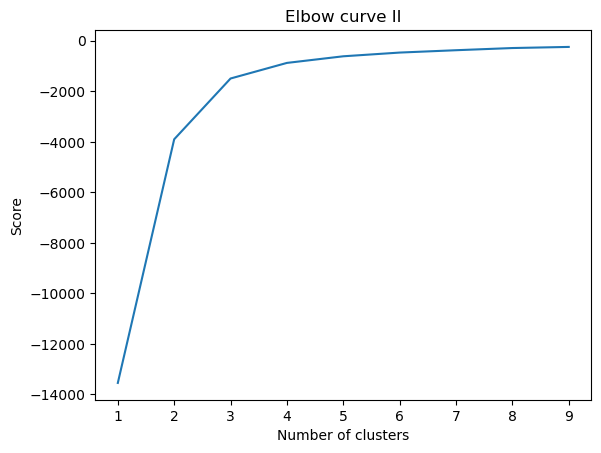

In [112]:
# Plot elbow curve

# Create plot
pl.plot(num_clusters, score)

# Add axis labels and title
pl.title('Elbow curve II')
pl.xlabel('Number of clusters')
pl.ylabel('Score')

The number of clusters will again be set to 3 as the curve flattens significantly from 3 clusters onwards.

## 07.5 k-means clustering II

In [113]:
# Create k-means object
kmeans = KMeans(n_clusters=3)

# Fit k-means object onto dataframe
kmeans.fit(df_norm)

KMeans(n_clusters=3)

In [114]:
# Create new column indicating cluster2
df_norm['cluster2'] = kmeans.fit_predict(df_norm)

In [115]:
# Check addition of new column
df_norm.head(10)

residential_units  commercial_units  total_units  land_square_feet  \
0            0.000048               0.0     0.000048          0.000017   
1            0.000048               0.0     0.000048          0.000036   
3            0.000048               0.0     0.000048          0.000038   
5            0.000048               0.0     0.000048          0.000028   
6            0.000048               0.0     0.000048          0.000029   
7            0.000048               0.0     0.000048          0.000012   
9            0.000048               0.0     0.000048          0.000012   
10           0.000048               0.0     0.000048          0.000011   
11           0.000048               0.0     0.000048          0.000012   
13           0.000048               0.0     0.000048          0.000007   

    gross_square_feet  year_built  sale_price  cluster2  
0            0.000061    0.946524    0.000186         0  
1            0.000152    0.887701    0.000267         0  
3            0.000102    0.860963    0.000216         2  
5            0.000217    0.911765    0.000255         0  
6            0.000172    0.874332    0.000221         2  
7            0.000051    0.754011    0.000105         1  
9            0.000041    0.713904    0.000061         1  
10           0.000088    0.903743    0.000134         0  
11           0.000167    0.903743    0.000185         0  
13           0.000102    0.903743    0.000146         0

In [116]:
# Count number of observations per cluster
df_norm['cluster2'].value_counts(dropna=False)

1    774673
2    533604
0    357445
Name: cluster2, dtype: int64

In [117]:
# Add cluster column to full dataframe

# Extract cluster column
extracted_col2 = df_norm['cluster2']

# Add extracted column to full df
df = df.join(extracted_col2)

# Print head of df
df.head(5)

borough_code  residential_units  commercial_units  total_units  \
0            5                  1                 0            1   
1            5                  1                 0            1   
3            5                  1                 0            1   
5            5                  1                 0            1   
6            5                  1                 0            1   

   land_square_feet  gross_square_feet  year_built tax_class_at_time_of_sale  \
0            3654.0              910.0        2002                         1   
1            7654.0             2277.0        1980                         1   
3            8190.0             1528.0        1970                         1   
5            5999.0             3250.0        1989                         1   
6            6200.0             2580.0        1975                         1   

  building_class_at_time_of_sale  sale_price  sale_date sale_or_transfer  \
0                             A5    764000.0 2022-06-30     regular sale   
1                             A1   1098000.0 2022-08-19     regular sale   
3                             A2    890000.0 2022-01-03     regular sale   
5                             A1   1050000.0 2022-08-31     regular sale   
6                             A1    910000.0 2022-04-05     regular sale   

    borough_name resid_or_non-resid cluster  cluster2  
0  Staten Island        residential     1.0         0  
1  Staten Island        residential     1.0         0  
3  Staten Island        residential     0.0         2  
5  Staten Island        residential     1.0         0  
6  Staten Island        residential     0.0         2

In [118]:
# Count values for column cluster in full dataframe
df['cluster2'].value_counts(dropna=False)

1    774673
2    533604
0    357445
Name: cluster2, dtype: int64

## 07.6 Visualise clustered data II

Text(0, 0.5, 'Sale price')

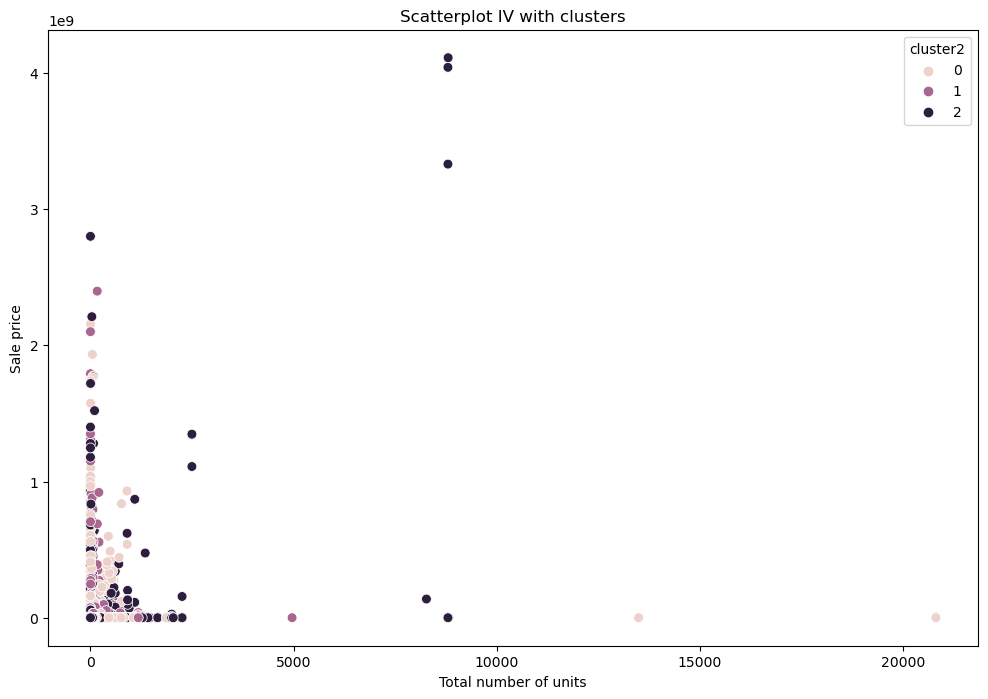

In [119]:
# Scatterplot of total_units and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_units'], y=df['sale_price'], hue=df['cluster2'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot IV with clusters')
plt.xlabel('Total number of units')
plt.ylabel('Sale price')

Text(0, 0.5, 'Sale price')

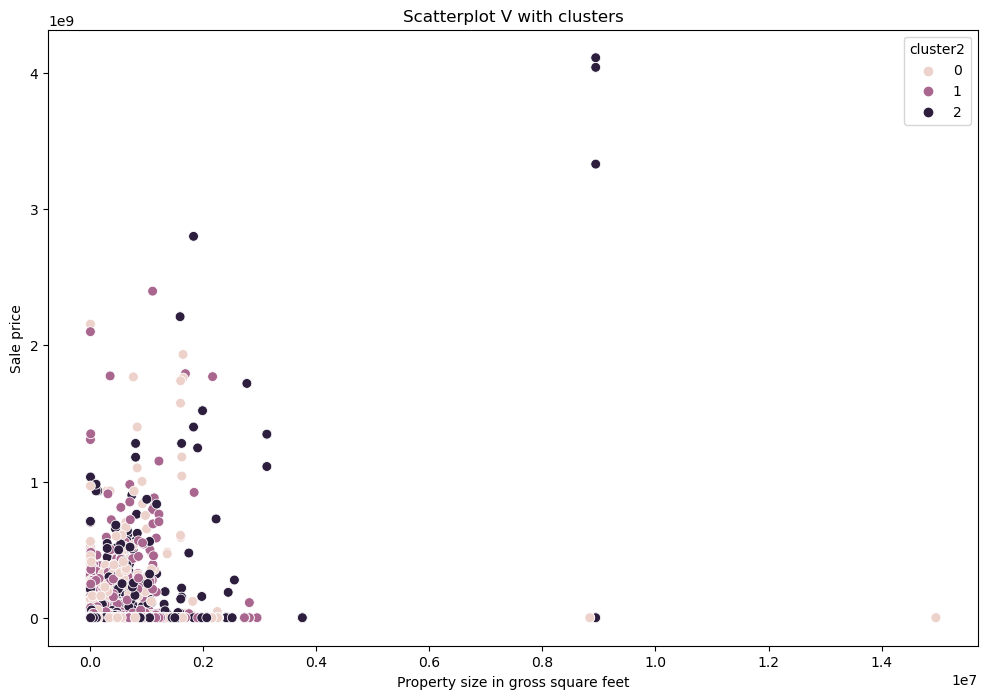

In [120]:
# Scatterplot of gross_square_feet and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['gross_square_feet'], y=df['sale_price'], hue=df['cluster2'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot V with clusters')
plt.xlabel('Property size in gross square feet')
plt.ylabel('Sale price')

Text(0, 0.5, 'Sale price')

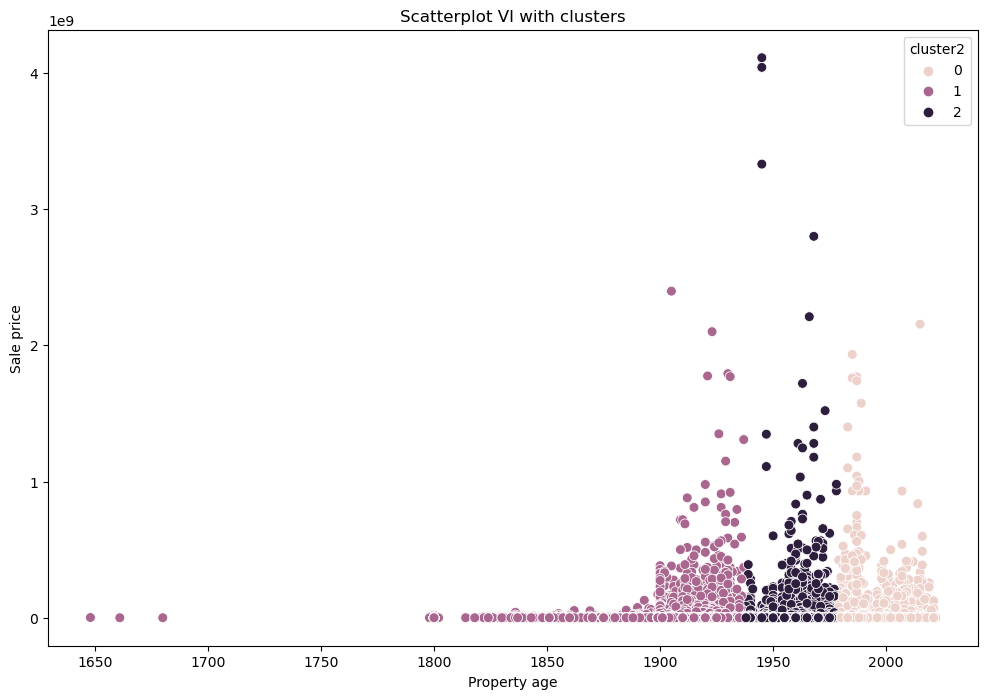

In [121]:
# Scatterplot of year_built and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['year_built'], y=df['sale_price'], hue=df['cluster2'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot VI with clusters')
plt.xlabel('Property age')
plt.ylabel('Sale price')

The second cluster analysis confirms that the only meaningful way to interpret the clusters is by age. Hence the column created in the first cluster analysis will be dropped and the second column as well as its values renamed.

column name: age_cluster; 1 : old property, 2 : medium aged property, 0 : new property

As a last step in the visualisation of the second cluster analysis, the distribution of age clusters across boroughs will be visualised to see whether useful insights can be deduced from this. 

Afterwards, the thrid cluster analysis will be carried out in order to form price clusters.

In [122]:
# Drop column cluster from dataframe
df = df.drop(columns= ['cluster'])

# Rename column 'cluster2'
df.rename(columns= {'cluster2' : 'age_cluster'}, inplace=True)

# Replace cluster numbers with values 
df.loc[df['age_cluster'] ==0, 'age_cluster'] = 'new property'
df.loc[df['age_cluster'] ==1, 'age_cluster'] = 'old property'
df.loc[df['age_cluster'] ==2, 'age_cluster'] = 'medium-aged property'

# Print head of dataframe
df.head()

borough_code  residential_units  commercial_units  total_units  \
0            5                  1                 0            1   
1            5                  1                 0            1   
3            5                  1                 0            1   
5            5                  1                 0            1   
6            5                  1                 0            1   

   land_square_feet  gross_square_feet  year_built tax_class_at_time_of_sale  \
0            3654.0              910.0        2002                         1   
1            7654.0             2277.0        1980                         1   
3            8190.0             1528.0        1970                         1   
5            5999.0             3250.0        1989                         1   
6            6200.0             2580.0        1975                         1   

  building_class_at_time_of_sale  sale_price  sale_date sale_or_transfer  \
0                             A5    764000.0 2022-06-30     regular sale   
1                             A1   1098000.0 2022-08-19     regular sale   
3                             A2    890000.0 2022-01-03     regular sale   
5                             A1   1050000.0 2022-08-31     regular sale   
6                             A1    910000.0 2022-04-05     regular sale   

    borough_name resid_or_non-resid           age_cluster  
0  Staten Island        residential          new property  
1  Staten Island        residential          new property  
3  Staten Island        residential  medium-aged property  
5  Staten Island        residential          new property  
6  Staten Island        residential  medium-aged property

Text(0, 0.5, 'Number of property sales and transfers')

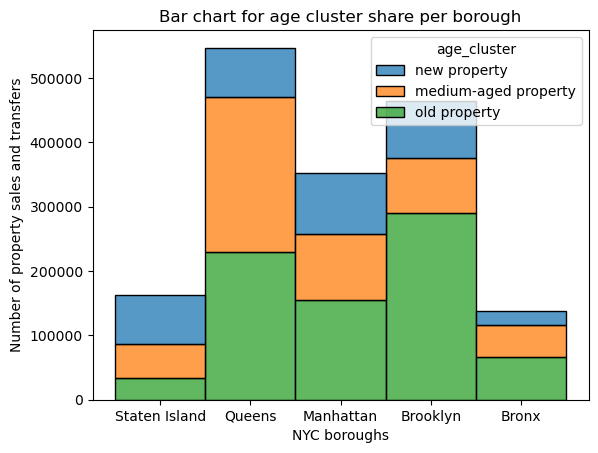

In [123]:
# Bar chart of properties per borough and age_cluster
# Create chart
sns.histplot(df, x='borough_name', hue='age_cluster', multiple='stack')

# Adapt style, add title and labels
plt.title('Bar chart for age cluster share per borough')
plt.xlabel('NYC boroughs')
plt.ylabel('Number of property sales and transfers')

The bar chart for age cluster shares across boroughs shows that the picture differs significantly from borough to borough. 

In Manhattan, circa 50 percent of sold or transferred properties are old. The remaining 50 percent are alomst equally divided among medium aged and new buildings. 

In the Bronx, too, circa 50 percent of sold or transferred properties are old. However, here the lion's share of the remaining 50 percent medium aged properties. 

In Brookly almost two thirds of sold or transferred properties are old. The remaining circa 30 percent are almost equally divided among medium aged and new buildings. 

Queens is particular in the sense that most sold or transferred properties are medium aged, closely followed by old properties. Circa 14 percent are new buildings.

Staten Island is particular in the sense circa 50 percent of sold or transferred properties are new, followed by circa 30 percent medium aged properties and 20 percent old properties. 

## 07.7 Data pre-processing III

In [124]:
# Check dimensions of full dataset
df.shape

(1665722, 15)

In [125]:
# Check number of regular sales in full dataset
df['sale_or_transfer'].value_counts()

regular sale          1160651
ownership transfer     483934
symbolic sale           21137
Name: sale_or_transfer, dtype: int64

In [126]:
# Creating basis for cluster analysis III
df_cluster3 = df.loc[df['sale_or_transfer'].isin(['regular sale', 'symbolic sale'])]

In [127]:
# Check dimensions of dataset for cluster analysis III
df_cluster3.shape

(1181788, 15)

In [128]:
# Get datatypes in dataset for cluster analysis III
df_cluster3.dtypes

borough_code                              object
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale                 object
building_class_at_time_of_sale            object
sale_price                               float64
sale_date                         datetime64[ns]
sale_or_transfer                          object
borough_name                              object
resid_or_non-resid                        object
age_cluster                               object
dtype: object

In [129]:
# Drop non-numerical columns

# Create list of columns to drop 
drop_cols3 = ['borough_code', 'year_built', 'tax_class_at_time_of_sale', 'building_class_at_time_of_sale', 'sale_date', 'sale_or_transfer', 'borough_name', 'resid_or_non-resid', 'age_cluster']

# Drop non-numerical columns
df_cluster3_num = df_cluster3.drop(columns = drop_cols3)

# Get dimensions of dataframe
df_cluster3_num.shape

(1181788, 6)

In [130]:
# Get descriptive stats of dataframe
df_cluster3_num.describe()

residential_units  commercial_units   total_units  land_square_feet  \
count       1.181788e+06      1.181788e+06  1.181788e+06      1.181788e+06   
mean        2.283821e+00      1.958304e-01  2.485898e+00      3.431981e+03   
std         3.111323e+01      7.304392e+00  3.206491e+01      2.866194e+05   
min         0.000000e+00      0.000000e+00  0.000000e+00      0.000000e+00   
25%         0.000000e+00      0.000000e+00  1.000000e+00      0.000000e+00   
50%         1.000000e+00      0.000000e+00  1.000000e+00      1.975000e+03   
75%         2.000000e+00      0.000000e+00  2.000000e+00      2.600000e+03   
max         2.081100e+04      4.964000e+03  2.081100e+04      2.147557e+08   

       gross_square_feet    sale_price  
count       1.181788e+06  1.181788e+06  
mean        3.894395e+03  1.330309e+06  
std         3.934287e+04  1.373898e+07  
min         0.000000e+00  1.000000e+00  
25%         0.000000e+00  3.125000e+05  
50%         1.346000e+03  5.200000e+05  
75%         2.176000e+03  8.566870e+05  
max         1.496215e+07  4.111112e+09

In [131]:
# Normalise data (due to skew known from previous data exploration)

# Create normalisation object
scaler = MinMaxScaler()

# Fit dataframe onto object
df_cluster3_norm = pd.DataFrame(scaler.fit_transform(df_cluster3_num), columns=df_cluster3_num.columns, index=df_cluster3_num.index)

# Print normalised dataframe
print(df_cluster3_norm)

         residential_units  commercial_units  total_units  land_square_feet  \
0                 0.000048               0.0     0.000048          0.000017   
1                 0.000048               0.0     0.000048          0.000036   
3                 0.000048               0.0     0.000048          0.000038   
5                 0.000048               0.0     0.000048          0.000028   
6                 0.000048               0.0     0.000048          0.000029   
...                    ...               ...          ...               ...   
1916221           0.000048               0.0     0.000048          0.000009   
1916225           0.000048               0.0     0.000048          0.000009   
1916243           0.000048               0.0     0.000048          0.000009   
1916245           0.000048               0.0     0.000048          0.000009   
1916253           0.000048               0.0     0.000048          0.000009   

         gross_square_feet  sale_price  
0         

In [132]:
# Inspect head of normalised dataframe
df_cluster3_norm.head()

residential_units  commercial_units  total_units  land_square_feet  \
0           0.000048               0.0     0.000048          0.000017   
1           0.000048               0.0     0.000048          0.000036   
3           0.000048               0.0     0.000048          0.000038   
5           0.000048               0.0     0.000048          0.000028   
6           0.000048               0.0     0.000048          0.000029   

   gross_square_feet  sale_price  
0           0.000061    0.000186  
1           0.000152    0.000267  
3           0.000102    0.000216  
5           0.000217    0.000255  
6           0.000172    0.000221

In [133]:
# Identify number of clusters

# Define range of potential number of clusters
num_clusters = range(1,10)

# Define k-means clusters within range
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

# Apply k-means algorithm to get score list
score = [kmeans[i].fit(df_cluster3_norm).score(df_cluster3_norm) for i in range(len(kmeans))]

# Print score list
print(score)

[-31.480664945521696, -23.492439059013684, -19.63974619518424, -15.84352465564147, -12.260586488584321, -10.342815649965988, -8.789371274078594, -7.572754452073358, -6.449285359255878]


Text(0, 0.5, 'Score')

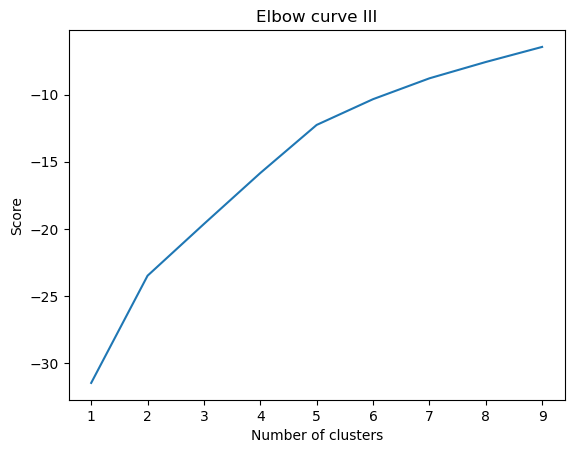

In [134]:
# Plot elbow curve

# Create plot
pl.plot(num_clusters, score)

# Add axis labels and title
pl.title('Elbow curve III')
pl.xlabel('Number of clusters')
pl.ylabel('Score')

The number of clusters will be set to 5 as the curve flattens significantly from 5 clusters onwards.

## 07.8 k-means clustering III

In [135]:
# Create k-means object
kmeans = KMeans(n_clusters=5)

# Fit k-means object onto dataframe
kmeans.fit(df_cluster3_norm)

KMeans(n_clusters=5)

In [136]:
# Create new column indicating cluster
df_cluster3_norm['cluster3'] = kmeans.fit_predict(df_cluster3_norm)

In [137]:
# Check addition of new column
df_cluster3_norm.head(10)

residential_units  commercial_units  total_units  land_square_feet  \
0            0.000048               0.0     0.000048          0.000017   
1            0.000048               0.0     0.000048          0.000036   
3            0.000048               0.0     0.000048          0.000038   
5            0.000048               0.0     0.000048          0.000028   
6            0.000048               0.0     0.000048          0.000029   
7            0.000048               0.0     0.000048          0.000012   
9            0.000048               0.0     0.000048          0.000012   
10           0.000048               0.0     0.000048          0.000011   
11           0.000048               0.0     0.000048          0.000012   
13           0.000048               0.0     0.000048          0.000007   

    gross_square_feet  sale_price  cluster3  
0            0.000061    0.000186         0  
1            0.000152    0.000267         0  
3            0.000102    0.000216         0  
5            0.000217    0.000255         0  
6            0.000172    0.000221         0  
7            0.000051    0.000105         0  
9            0.000041    0.000061         0  
10           0.000088    0.000134         0  
11           0.000167    0.000185         0  
13           0.000102    0.000146         0

In [138]:
# Count number of observations per cluster
df_cluster3_norm['cluster3'].value_counts(dropna=False)

0    1179281
4       2426
1         74
3          5
2          2
Name: cluster3, dtype: int64

In [139]:
# Add cluster column to full dataframe

# Extract cluster column
extracted_col3 = df_cluster3_norm['cluster3']

# Add extracted column to dataframe
df = df.join(extracted_col3)

# Print head of df
df.head()

borough_code  residential_units  commercial_units  total_units  \
0            5                  1                 0            1   
1            5                  1                 0            1   
3            5                  1                 0            1   
5            5                  1                 0            1   
6            5                  1                 0            1   

   land_square_feet  gross_square_feet  year_built tax_class_at_time_of_sale  \
0            3654.0              910.0        2002                         1   
1            7654.0             2277.0        1980                         1   
3            8190.0             1528.0        1970                         1   
5            5999.0             3250.0        1989                         1   
6            6200.0             2580.0        1975                         1   

  building_class_at_time_of_sale  sale_price  sale_date sale_or_transfer  \
0                             A5    764000.0 2022-06-30     regular sale   
1                             A1   1098000.0 2022-08-19     regular sale   
3                             A2    890000.0 2022-01-03     regular sale   
5                             A1   1050000.0 2022-08-31     regular sale   
6                             A1    910000.0 2022-04-05     regular sale   

    borough_name resid_or_non-resid           age_cluster  cluster3  
0  Staten Island        residential          new property       0.0  
1  Staten Island        residential          new property       0.0  
3  Staten Island        residential  medium-aged property       0.0  
5  Staten Island        residential          new property       0.0  
6  Staten Island        residential  medium-aged property       0.0

In [140]:
# Count values for column cluster3 
df['cluster3'].value_counts(dropna=False)

0.0    1179281
NaN     483934
4.0       2426
1.0         74
3.0          5
2.0          2
Name: cluster3, dtype: int64

In [141]:
# Fill nan values in column cluster3 with value 'ownership transfer'
df.loc[df['sale_or_transfer'] == 'ownership transfer', 'cluster3'] = 'ownership transfer'

In [142]:
# Count values for column cluster3
df['cluster3'].value_counts(dropna=False)

0.0                   1179281
ownership transfer     483934
4.0                      2426
1.0                        74
3.0                         5
2.0                         2
Name: cluster3, dtype: int64

## 07.9 Visualise clustered data III

Text(0, 0.5, 'Sale price')

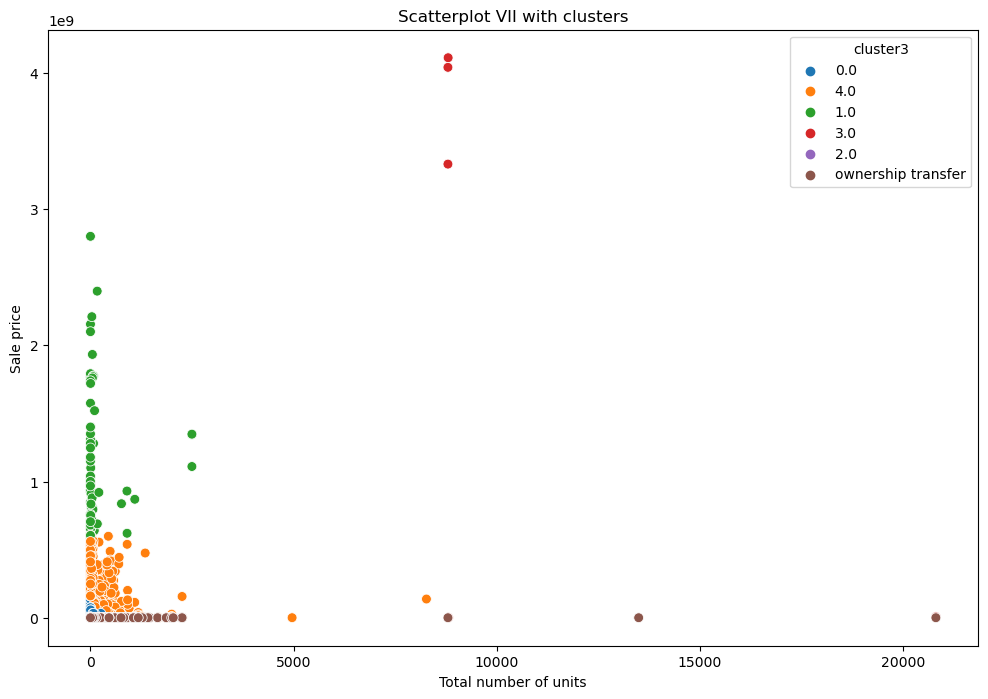

In [143]:
# Scatterplot of total_units and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_units'], y=df['sale_price'], hue=df['cluster3'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot VII with clusters')
plt.xlabel('Total number of units')
plt.ylabel('Sale price')

Text(0, 0.5, 'Sale price')

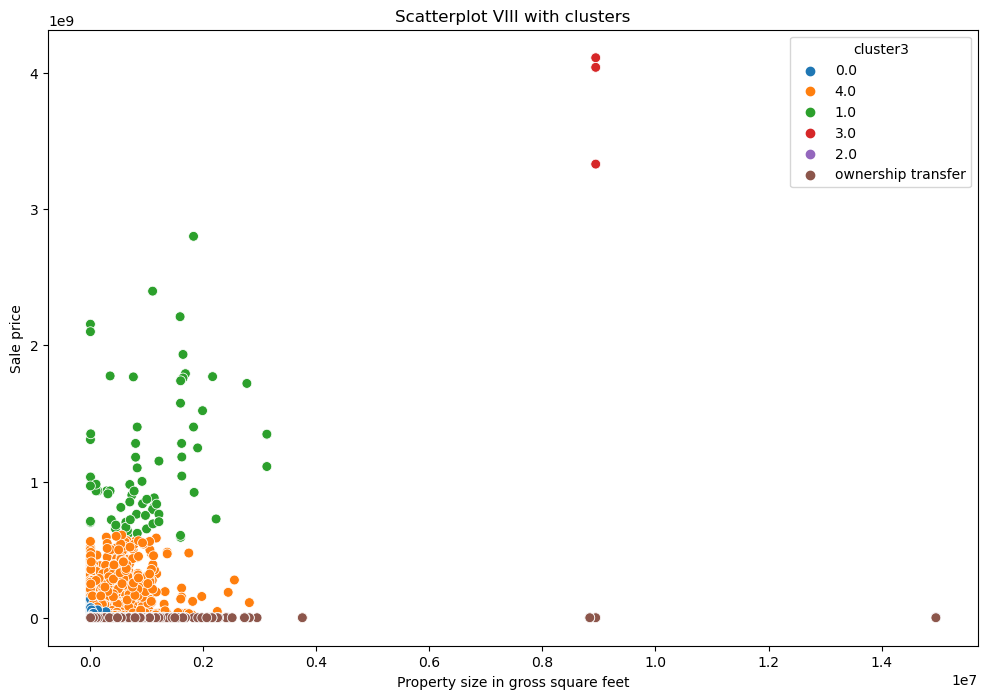

In [144]:
# Scatterplot of gross_square_feet and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['gross_square_feet'], y=df['sale_price'], hue=df['cluster3'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot VIII with clusters')
plt.xlabel('Property size in gross square feet')
plt.ylabel('Sale price')

Text(0, 0.5, 'Sale price')

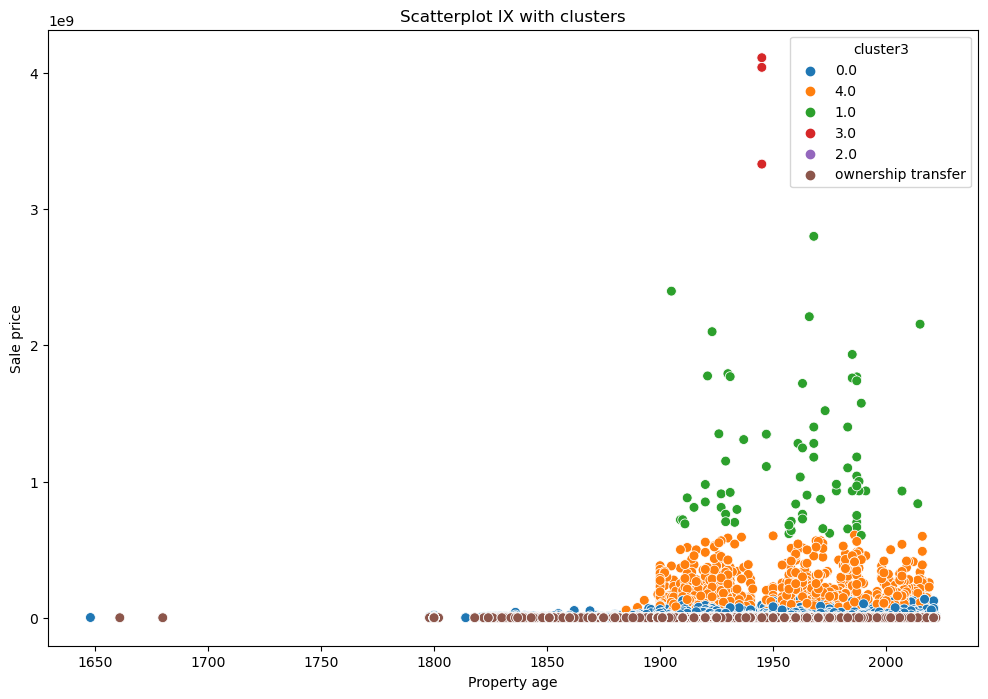

In [145]:
# Scatterplot of year_built and sale_price
# Create plot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['year_built'], y=df['sale_price'], hue=df['cluster3'], s=50)

# Adapt style, add title and labels
ax.grid(False)
plt.title('Scatterplot IX with clusters')
plt.xlabel('Property age')
plt.ylabel('Sale price')

In [146]:
# Print observations for cluster 2
df.loc[df['cluster3']==2]

borough_code  residential_units  commercial_units  total_units  \
1386954            4                  0               133          133   
1386956            4                  0               133          133   

         land_square_feet  gross_square_feet  year_built  \
1386954       214755710.0         14962152.0        1994   
1386956       214755710.0         14962152.0        1994   

        tax_class_at_time_of_sale building_class_at_time_of_sale  sale_price  \
1386954                         4                             T1   3834460.0   
1386956                         4                             T1   2254244.0   

         sale_date sale_or_transfer borough_name resid_or_non-resid  \
1386954 2006-06-30     regular sale       Queens    non-residential   
1386956 2006-06-28     regular sale       Queens    non-residential   

          age_cluster cluster3  
1386954  new property      2.0  
1386956  new property      2.0

In [147]:
# Get minimum, average and maximum prices for all clusters
df.groupby('cluster3').agg({'sale_price':['min', 'mean', 'median', 'max']})

sale_price                                          
                            min          mean        median           max
cluster3                                                                 
0.0                         1.0  1.054874e+06  5.200000e+05  1.356350e+08
1.0                 590333250.0  1.125845e+09  9.310000e+08  2.800000e+09
2.0                   2254244.0  3.044352e+06  3.044352e+06  3.834460e+06
3.0                    600000.0  2.297774e+09  3.330133e+09  4.111112e+09
4.0                         1.0  9.618410e+07  4.707500e+07  6.067850e+08
ownership transfer          0.0  0.000000e+00  0.000000e+00  0.000000e+00

The column cluster3 will be renamed to price_cluster and the cluster numbers replaced with the following values (ownership transfers remain unchanged):

0 : very low-priced (blue), 1 : high-priced (green), 2 : low-priced (violet), 3 : very high-priced (red), 4 : medium-priced (orange).

In [148]:
# Rename column 'cluster3'
df.rename(columns= {'cluster3' : 'price_cluster'}, inplace=True)

# Replace cluster numbers with values 
df.loc[df['price_cluster'] ==0, 'price_cluster'] = 'very low-priced'
df.loc[df['price_cluster'] ==1, 'price_cluster'] = 'high-priced'
df.loc[df['price_cluster'] ==2, 'price_cluster'] = 'low-priced'
df.loc[df['price_cluster'] ==3, 'price_cluster'] = 'very high-priced'
df.loc[df['price_cluster'] ==4, 'price_cluster'] = 'medium-priced'

# Print head of dataframe
df.head()

borough_code  residential_units  commercial_units  total_units  \
0            5                  1                 0            1   
1            5                  1                 0            1   
3            5                  1                 0            1   
5            5                  1                 0            1   
6            5                  1                 0            1   

   land_square_feet  gross_square_feet  year_built tax_class_at_time_of_sale  \
0            3654.0              910.0        2002                         1   
1            7654.0             2277.0        1980                         1   
3            8190.0             1528.0        1970                         1   
5            5999.0             3250.0        1989                         1   
6            6200.0             2580.0        1975                         1   

  building_class_at_time_of_sale  sale_price  sale_date sale_or_transfer  \
0                             A5    764000.0 2022-06-30     regular sale   
1                             A1   1098000.0 2022-08-19     regular sale   
3                             A2    890000.0 2022-01-03     regular sale   
5                             A1   1050000.0 2022-08-31     regular sale   
6                             A1    910000.0 2022-04-05     regular sale   

    borough_name resid_or_non-resid           age_cluster    price_cluster  
0  Staten Island        residential          new property  very low-priced  
1  Staten Island        residential          new property  very low-priced  
3  Staten Island        residential  medium-aged property  very low-priced  
5  Staten Island        residential          new property  very low-priced  
6  Staten Island        residential  medium-aged property  very low-priced

In [149]:
# Count values in price_cluster
df['price_cluster'].value_counts(dropna=False)

very low-priced       1179281
ownership transfer     483934
medium-priced            2426
high-priced                74
very high-priced            5
low-priced                  2
Name: price_cluster, dtype: int64

Text(0, 0.5, 'Number of property sales')

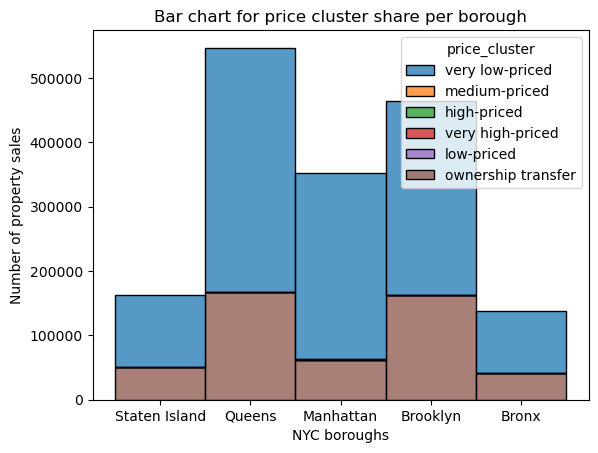

In [150]:
# Bar chart of properties per borough and price_cluster
# Create chart
sns.histplot(df, x='borough_name', hue='price_cluster', multiple='stack')

# Adapt style, add title and labels
plt.title('Bar chart for price cluster share per borough')
plt.xlabel('NYC boroughs')
plt.ylabel('Number of property sales')

While this last cluster analysis seem useful in clustering property sales into price categories when looking at the scatterplots, its results can be doubted when looking at the bar chart which suggests that most sales fall into the category of very low prices, followed by ownership transfers. It might be worth attempting a forth cluster process with 3 clusters to force observations into the categories of low, medium and high prices. 

## 07.10 Data pre-processing IV

In [151]:
# Check dimensions of full dataset
df.shape

(1665722, 16)

In [152]:
# Check number of regular sales in full dataset
df['sale_or_transfer'].value_counts()

regular sale          1160651
ownership transfer     483934
symbolic sale           21137
Name: sale_or_transfer, dtype: int64

In [153]:
# Creating basis for cluster analysis IV
df_cluster4 = df.loc[df['sale_or_transfer'].isin(['regular sale', 'symbolic sale'])]

In [154]:
# Check dimensions of dataset for cluster analysis IV
df_cluster4.shape

(1181788, 16)

In [155]:
# Get datatypes in dataset for cluster analysis IV
df_cluster4.dtypes

borough_code                              object
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale                 object
building_class_at_time_of_sale            object
sale_price                               float64
sale_date                         datetime64[ns]
sale_or_transfer                          object
borough_name                              object
resid_or_non-resid                        object
age_cluster                               object
price_cluster                             object
dtype: object

In [156]:
# Drop non-numerical columns

# Create list of columns to drop 
drop_cols4 = ['borough_code', 'year_built', 'tax_class_at_time_of_sale', 'building_class_at_time_of_sale', 'sale_date', 'sale_or_transfer', 'borough_name', 'resid_or_non-resid', 'age_cluster', 'price_cluster']

# Drop non-numerical columns
df_cluster4_num = df_cluster4.drop(columns = drop_cols4)

# Get dimensions of dataframe
df_cluster4_num.shape

(1181788, 6)

In [157]:
# Normalise data (due to skew known from previous data exploration)

# Create normalisation object
scaler = MinMaxScaler()

# Fit dataframe onto object
df_cluster4_norm = pd.DataFrame(scaler.fit_transform(df_cluster4_num), columns=df_cluster4_num.columns, index=df_cluster4_num.index)

# Print normalised dataframe
print(df_cluster4_norm)

         residential_units  commercial_units  total_units  land_square_feet  \
0                 0.000048               0.0     0.000048          0.000017   
1                 0.000048               0.0     0.000048          0.000036   
3                 0.000048               0.0     0.000048          0.000038   
5                 0.000048               0.0     0.000048          0.000028   
6                 0.000048               0.0     0.000048          0.000029   
...                    ...               ...          ...               ...   
1916221           0.000048               0.0     0.000048          0.000009   
1916225           0.000048               0.0     0.000048          0.000009   
1916243           0.000048               0.0     0.000048          0.000009   
1916245           0.000048               0.0     0.000048          0.000009   
1916253           0.000048               0.0     0.000048          0.000009   

         gross_square_feet  sale_price  
0         

In [158]:
# Inspect head of normalised dataframe
df_cluster4_norm.head()

residential_units  commercial_units  total_units  land_square_feet  \
0           0.000048               0.0     0.000048          0.000017   
1           0.000048               0.0     0.000048          0.000036   
3           0.000048               0.0     0.000048          0.000038   
5           0.000048               0.0     0.000048          0.000028   
6           0.000048               0.0     0.000048          0.000029   

   gross_square_feet  sale_price  
0           0.000061    0.000186  
1           0.000152    0.000267  
3           0.000102    0.000216  
5           0.000217    0.000255  
6           0.000172    0.000221

In [159]:
# Identify number of clusters (although 3 will be chosen anyways)

# Define range of potential number of clusters
num_clusters = range(1,10)

# Define k-means clusters within range
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

# Apply k-means algorithm to get score list
score = [kmeans[i].fit(df_cluster4_norm).score(df_cluster4_norm) for i in range(len(kmeans))]

# Print score list
print(score)

[-31.480664945521696, -23.492439059013684, -18.888181955281986, -15.84352465564147, -12.260580661775828, -10.342815649965988, -8.78937202921789, -7.572754452073358, -6.449285359255878]


Text(0, 0.5, 'Score')

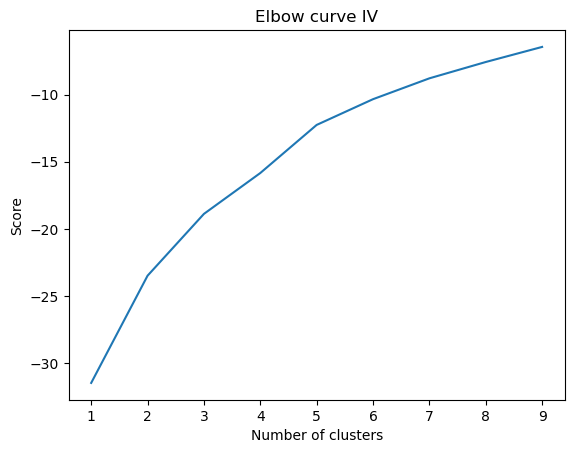

In [160]:
# Plot elbow curve

# Create plot
pl.plot(num_clusters, score)

# Add axis labels and title
pl.title('Elbow curve IV')
pl.xlabel('Number of clusters')
pl.ylabel('Score')

Although the curve only significantly flattens from 5 onwards, the number of clusters will be set to 3 in an attempt to force observations into 3 price clusters.

## 07.11 k-means clustering IV

In [161]:
# Create k-means object
kmeans = KMeans(n_clusters=3)

# Fit k-means object onto dataframe
kmeans.fit(df_cluster4_norm)

KMeans(n_clusters=3)

In [162]:
# Create new column indicating cluster
df_cluster4_norm['cluster4'] = kmeans.fit_predict(df_cluster4_norm)

In [163]:
# Check addition of new column
df_cluster4_norm.head(10)

residential_units  commercial_units  total_units  land_square_feet  \
0            0.000048               0.0     0.000048          0.000017   
1            0.000048               0.0     0.000048          0.000036   
3            0.000048               0.0     0.000048          0.000038   
5            0.000048               0.0     0.000048          0.000028   
6            0.000048               0.0     0.000048          0.000029   
7            0.000048               0.0     0.000048          0.000012   
9            0.000048               0.0     0.000048          0.000012   
10           0.000048               0.0     0.000048          0.000011   
11           0.000048               0.0     0.000048          0.000012   
13           0.000048               0.0     0.000048          0.000007   

    gross_square_feet  sale_price  cluster4  
0            0.000061    0.000186         0  
1            0.000152    0.000267         0  
3            0.000102    0.000216         0  
5            0.000217    0.000255         0  
6            0.000172    0.000221         0  
7            0.000051    0.000105         0  
9            0.000041    0.000061         0  
10           0.000088    0.000134         0  
11           0.000167    0.000185         0  
13           0.000102    0.000146         0

In [164]:
# Count number of observations per cluster
df_cluster4_norm['cluster4'].value_counts(dropna=False)

0    1181657
2        124
1          7
Name: cluster4, dtype: int64

The forth clustering process stops here as it can already be seen from the count of observations per cluster that the attempt to force observations into 3 meaningful clusters failed (it's definitely not more useful than the price cluster that has been created in the previous cluster process). The column cluster4 will not be added to the dataframe. Instead, the price clusters identified in the previous cluster process will be kept. 

Cluster analysis of the dataset ends here. Further exploration of the dataset continues with time series analysis and visualisation. 

# 08 Time series analysis

Time series analysis will be carried out on regular sales. Overall price development for regular sales will be compared to price development for regular sales across boroughs. Dataframes previously split and used for this purpose are:
1) Regular sales Manhattan: df1regsl
2) Regular sales the Bronx: df2regsl
3) Regular sales Brooklyn: df3regsl
4) Regular sales Queens: df4regsl
5) Regular sales Staten Island: df5regsl
6) Regular sales (all boroughs): needs to be created in data pre-processing

## 08.1 Data pre-processing

In [165]:
# Get dimensions of df
df.shape

(1665722, 16)

In [166]:
# Count observations for regular sales
df['sale_or_transfer'].value_counts(dropna=False)

regular sale          1160651
ownership transfer     483934
symbolic sale           21137
Name: sale_or_transfer, dtype: int64

In [167]:
# Create dataframe with all regular sales from all boroughs
df0regsl = df.loc[df['sale_or_transfer'] == 'regular sale']

In [168]:
# Get dimensions of df0regsl
df0regsl.shape

(1160651, 16)

In [169]:
# Get columns in df
df0regsl.dtypes

borough_code                              object
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale                 object
building_class_at_time_of_sale            object
sale_price                               float64
sale_date                         datetime64[ns]
sale_or_transfer                          object
borough_name                              object
resid_or_non-resid                        object
age_cluster                               object
price_cluster                             object
dtype: object

In [170]:
# Get columns in df1regsl
df1regsl.dtypes

borough_code                              object
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale                 object
building_class_at_time_of_sale            object
sale_price                               float64
sale_date                         datetime64[ns]
sale_or_transfer                          object
borough_name                              object
resid_or_non-resid                        object
dtype: object

In [171]:
# Smoothen data

# Create list of irrelevant columns to drop
drop_cols_overall = ['borough_code', 'residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'tax_class_at_time_of_sale', 'building_class_at_time_of_sale', 'sale_or_transfer', 'borough_name', 'resid_or_non-resid', 'age_cluster', 'price_cluster']
drop_cols_boroughs = ['borough_code', 'residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'tax_class_at_time_of_sale', 'building_class_at_time_of_sale', 'sale_or_transfer', 'borough_name', 'resid_or_non-resid']

# Create dataframes with irrelevant columns dropped
df_0 = df0regsl.drop(columns=drop_cols_overall)
df_1 = df1regsl.drop(columns=drop_cols_boroughs)
df_2 = df2regsl.drop(columns=drop_cols_boroughs)
df_3 = df3regsl.drop(columns=drop_cols_boroughs)
df_4 = df4regsl.drop(columns=drop_cols_boroughs)
df_5 = df5regsl.drop(columns=drop_cols_boroughs)

In [172]:
# Convert sale_date to index in dataframes
df_0 = df_0.set_index('sale_date')
df_1 = df_1.set_index('sale_date')
df_2 = df_2.set_index('sale_date')
df_3 = df_3.set_index('sale_date')
df_4 = df_4.set_index('sale_date')
df_5 = df_5.set_index('sale_date')

In [173]:
# Get monthly average price and store in new dataframes
df_0_series = df_0.resample('M').mean()
df_1_series = df_1.resample('M').mean()
df_2_series = df_2.resample('M').mean()
df_3_series = df_3.resample('M').mean()
df_4_series = df_4.resample('M').mean()
df_5_series = df_5.resample('M').mean()

## 08.2 Time series visualisation

In [174]:
# Set styling option for plots
plt.style.use('ggplot')

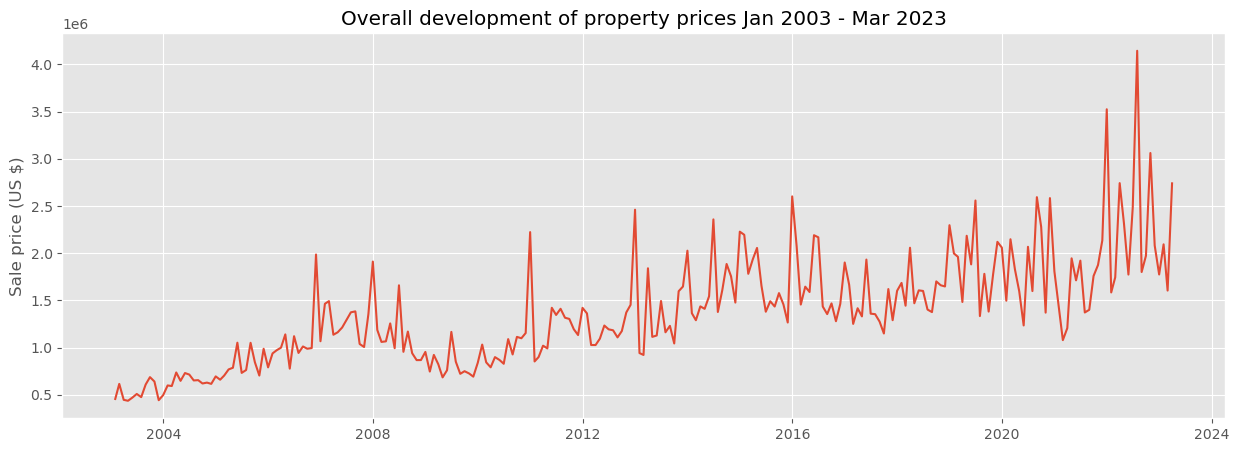

In [175]:
# Line chart for overall price development

# Set figure size and reduce quality of visual to dpi=100 to save RAM
plt.figure(figsize=(15,5), dpi=100)

# Add title and axis labels
plt.title('Overall development of property prices Jan 2003 - Mar 2023')
plt.ylabel('Sale price (US $)')

ax.legend()

# Plot chart
plt.plot(df_0_series)

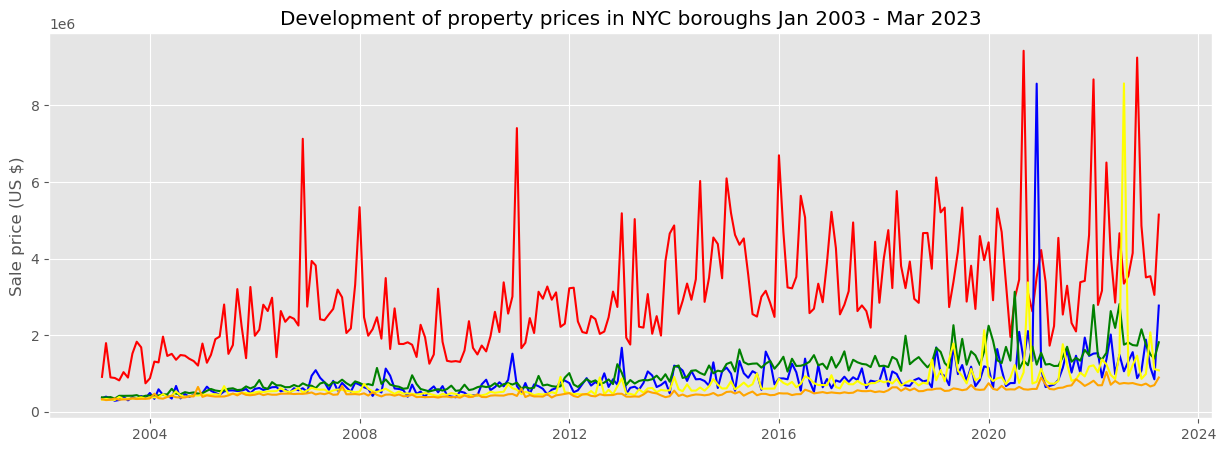

In [176]:
# Line chart for price development across boroughs

# Set figure size and reduce quality of visual to dpi=100 to save RAM
plt.figure(figsize=(15,5), dpi=100)

# Add title and axis labels
plt.title('Development of property prices in NYC boroughs Jan 2003 - Mar 2023')
plt.ylabel('Sale price (US $)')

# Plot chart
plt.plot(df_1_series, color='red')
plt.plot(df_2_series, color='blue')
plt.plot(df_3_series, color='green')
plt.plot(df_4_series, color='yellow')
plt.plot(df_5_series, color='orange')

The comparison of price developments across boroughs clearly shows that property prices were by far most expensive in Manhattan until the early 2020s. Only then were peak prices paid for properties in the Bronx and Queens which led to only two points in time when Manhattan wasn't the borough with the higest average prices.

Manhattan aside, price development was rather similar within a common range for the Bronx, Brooklyn and Queens. Interestingly Staten Island has a less steep price development than the Bronx, Brooklyn and Queens. Also, variance seems to be lowest for Staten Island. 

Overall price development as well as price development per boroughs will be decomposed to confirm whether there are dominant upward trends from each perspective and to evaluate whether outside events may have had an effect on property prices. 

In [177]:
# Decompose overall price development
decomposition = sm.tsa.seasonal_decompose(df_0_series, model='additive')

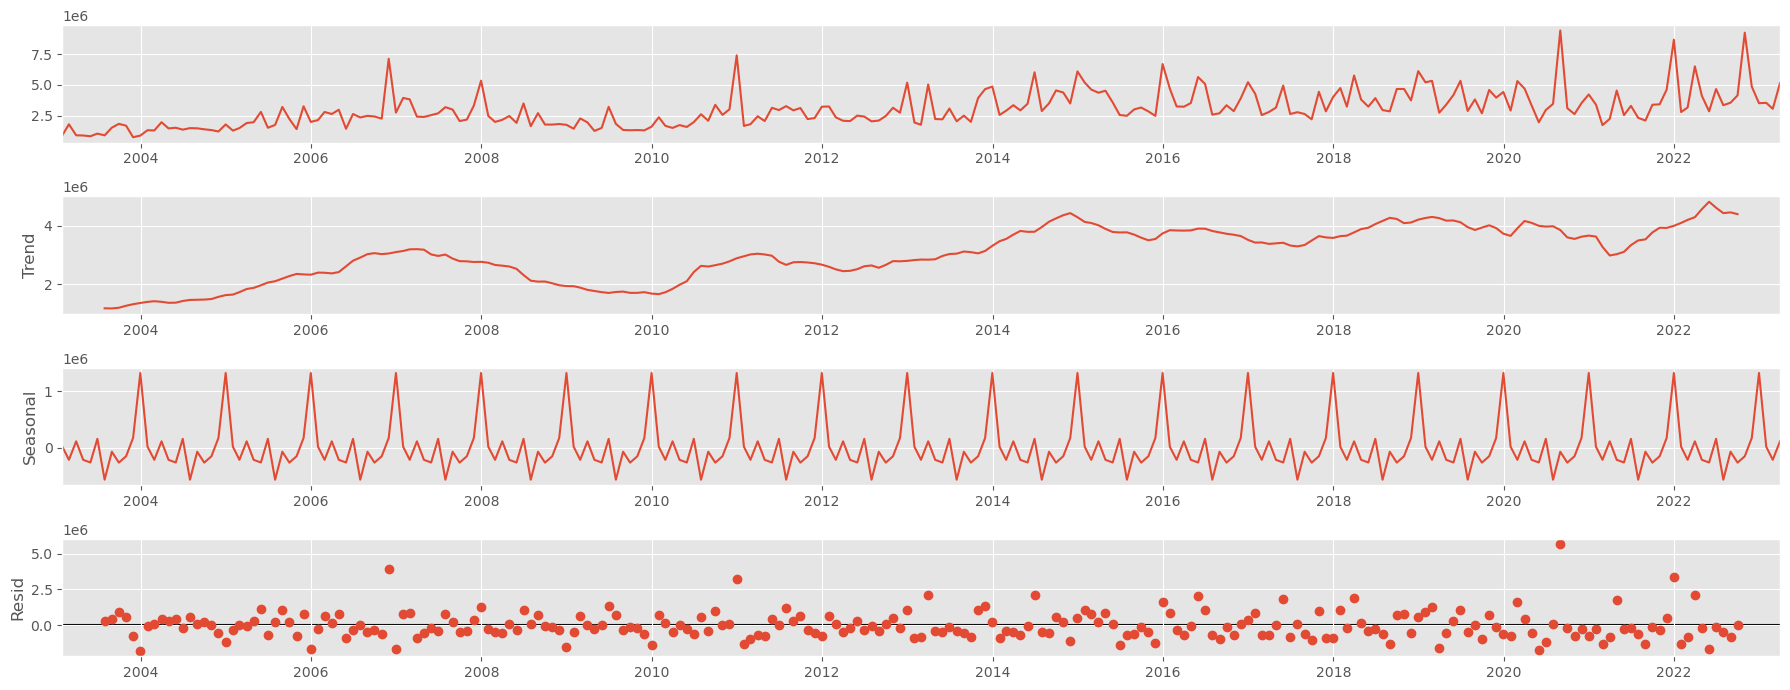

In [184]:
# Plot decomposed overall price development

# Import relevant function from pylab
from pylab import rcParams

# Define fixed size for all charts
rcParams['figure.figsize'] = 18,7

# Plot charts
decomposition.plot()
plt.show()

The visualisation of the decomposed overall price development shows that there is a dominant upward trend in property prices despite some ups and downs over time. 

The seasonality chart shows that sale prices follow a seasonal pattern with drops in sale prices at the beginning of the year and spikes towards the end of the year. This pattern can be expected to be found for all boroughs.

The residual chart shows that there is quite some noise in the data. This was to be expected against the background of previous insights into the data which showed how broadly sale prices vary.

From the trend chart, a drop in prices from ca. 2008 to ca. 2010 can be seen which can be understood to confirm that the internatinal financial and banking crisis did negatively affect NYC propery prices. 

The trend for Covid pandemic is less obvious. There's a small dip in 2020 and until mid-2021 there's a slight upward trend until prices rose again. However, the temporary decrease in prices was a lot less significant than between 2008 and 2010.

In [181]:
# Decompose Manhattan price development
decomposition = sm.tsa.seasonal_decompose(df_1_series, model='additive')

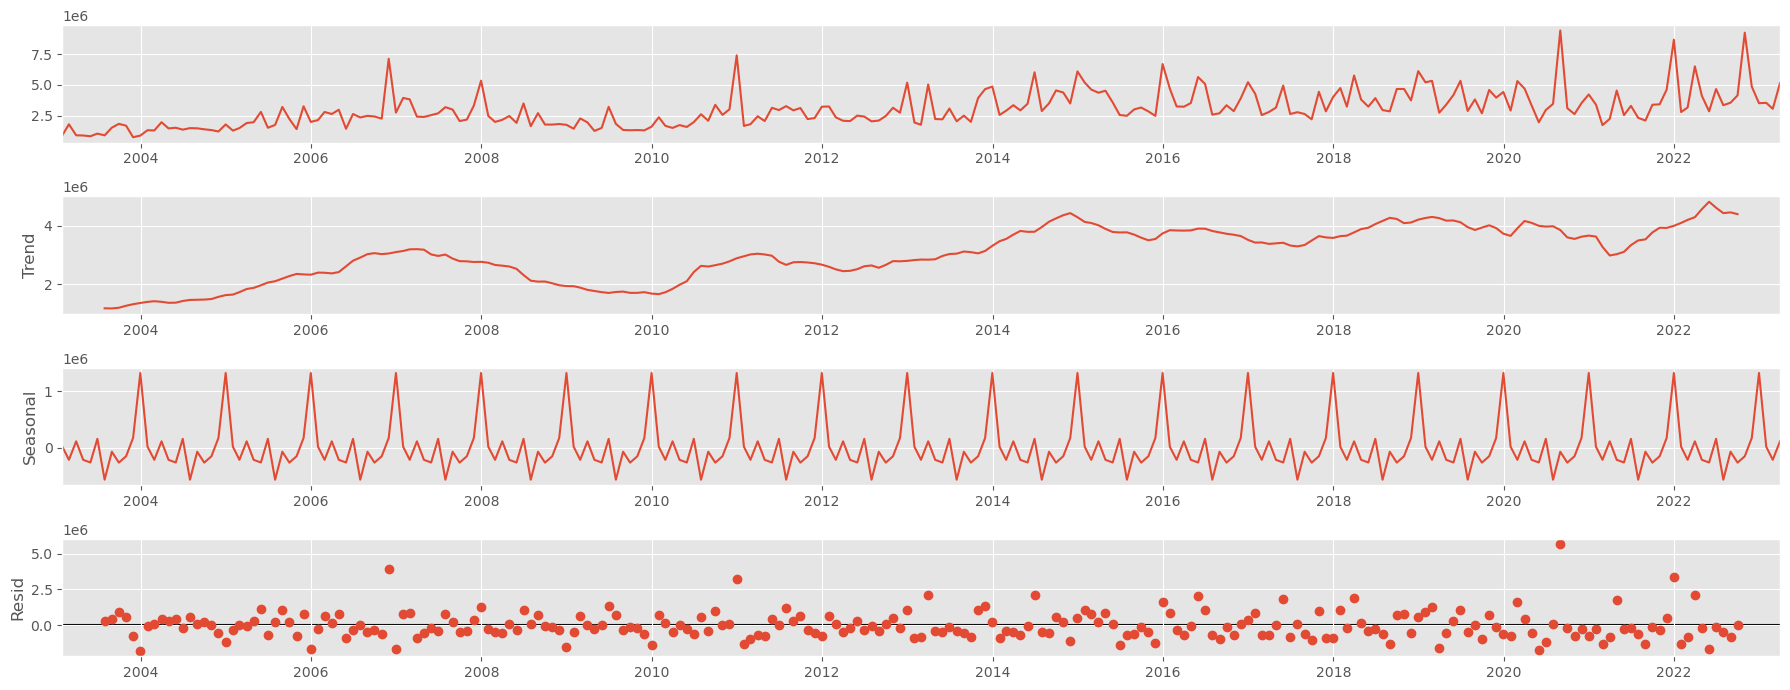

In [182]:
# Plot decomposed Manhattan price development

# Define fixed size for all charts
rcParams['figure.figsize'] = 18,7

# Plot charts
decomposition.plot()
plt.show()

The general dominant upward trend can be confirmed for Manhattan. While the effect of the 2008 financial crisis is as visible for Manhattan as it was for the overall price development, the effect of the Covid pandemic seems clearer for Manhattan than it was for overall price development.

In [185]:
# Decompose the Bronx price development
decomposition = sm.tsa.seasonal_decompose(df_2_series, model='additive')

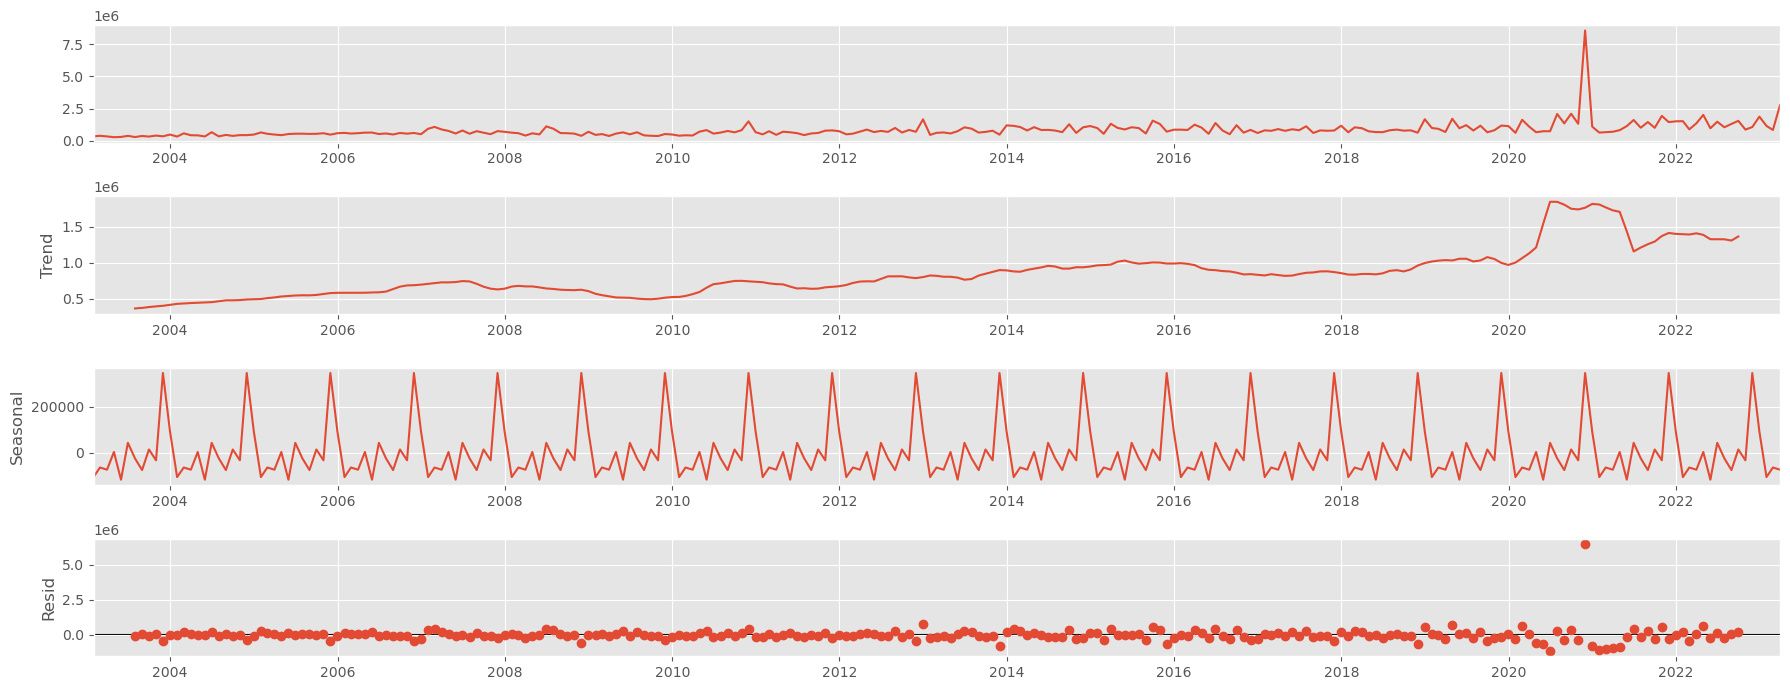

In [186]:
# Plot decomposed the Bronx price development

# Define fixed size for all charts
rcParams['figure.figsize'] = 18,7

# Plot charts
decomposition.plot()
plt.show()

The general dominant upward trend can be confirmed for the Bronx, too. At the same time, price development for the Bronx differs significantly from overall and Manhattan price development. On the one hand, the effect of the 2008 financial crisis was less striking. On the other hand, while overall and Manhattan prices dropped a bit from 2020 until mid-2021, there was a steep rise in prices in the Bronx at the beginning of 2020, reaching a plateau until a drop to slightly above the pre-2020 level in mid-2021.

Lastly, the amount of noise in the Bronx data is significanlty lower than for Manhattan. However, noise has grown in recent years which could be an indicator of the Bronx becoming more interesting for speculators. 

In [187]:
# Decompose Brooklyn price development
decomposition = sm.tsa.seasonal_decompose(df_3_series, model='additive')

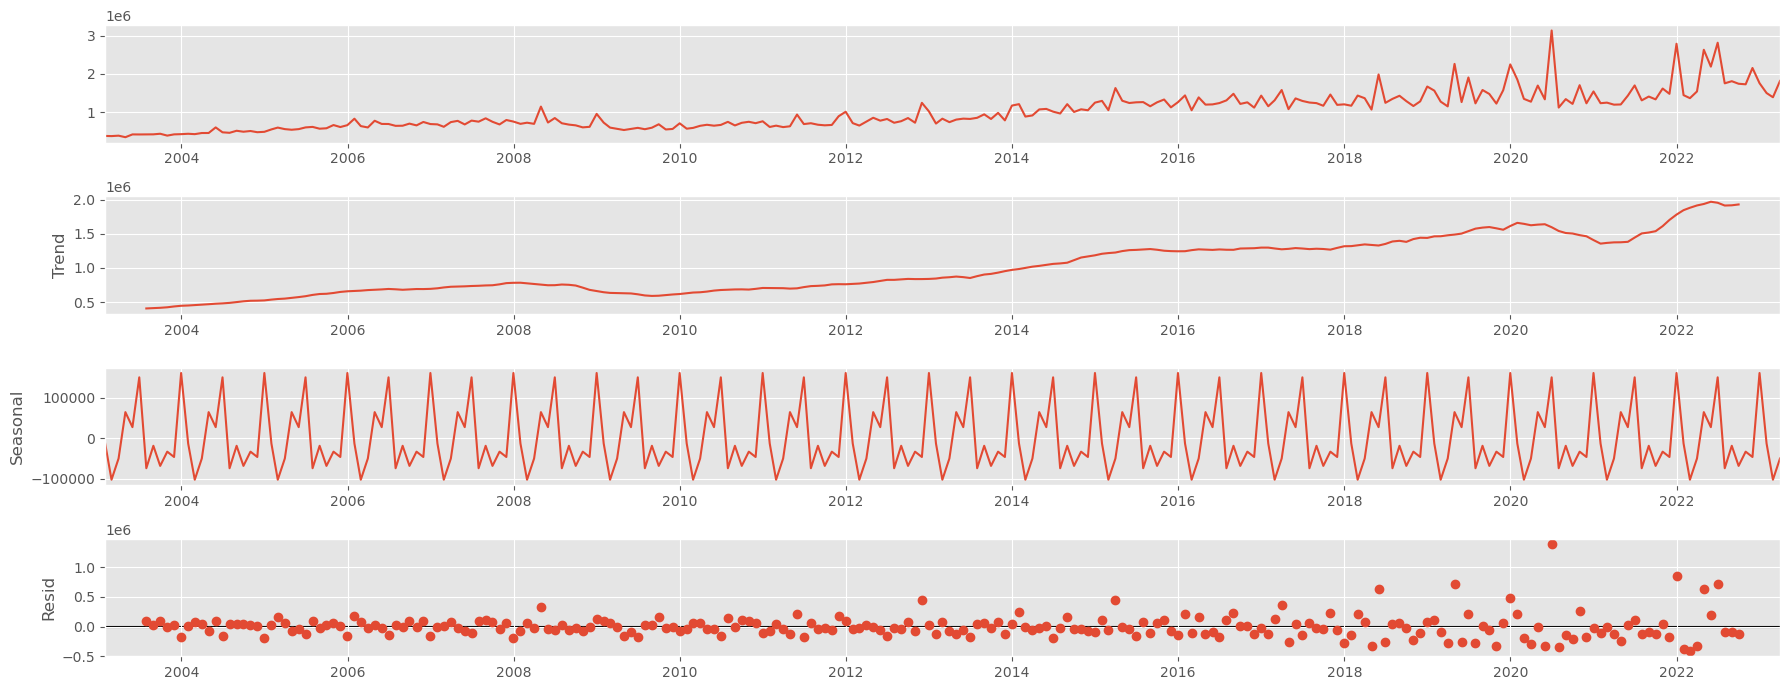

In [188]:
# Plot decomposed Brooklyn price development

# Define fixed size for all charts
rcParams['figure.figsize'] = 18,7

# Plot charts
decomposition.plot()
plt.show()

The picture for Brooklyn is quite similar to the one found for Manhattan with the difference that the effect of the 2008 financial crisis is less visible for Brooklyn. 

In [189]:
# Decompose Queens price development
decomposition = sm.tsa.seasonal_decompose(df_4_series, model='additive')

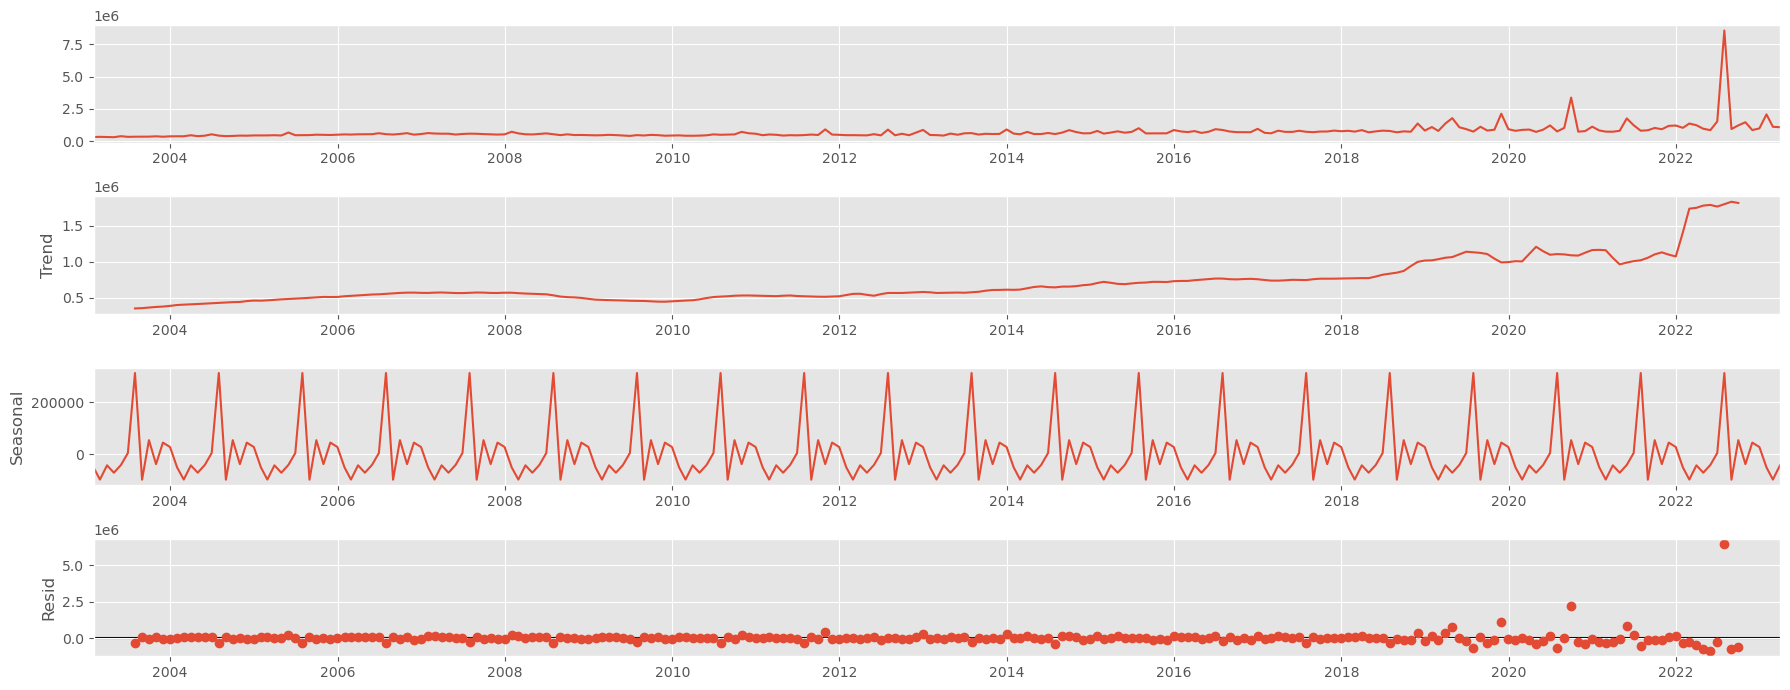

In [190]:
# Plot decomposed Queens price development

# Define fixed size for all charts
rcParams['figure.figsize'] = 18,7

# Plot charts
decomposition.plot()
plt.show()

The picture for Queens is similar to Brooklyn: an only mildly visible effect from the 2008 financial crisis and a mild, potential drop from the Covid pandemic. 

Different from Manhattan and Brooklyn and similar to the Bronx, the amount of noise in the data for Queens is relatively low.  

In [191]:
# Decompose Staten Island price development
decomposition = sm.tsa.seasonal_decompose(df_5_series, model='additive')

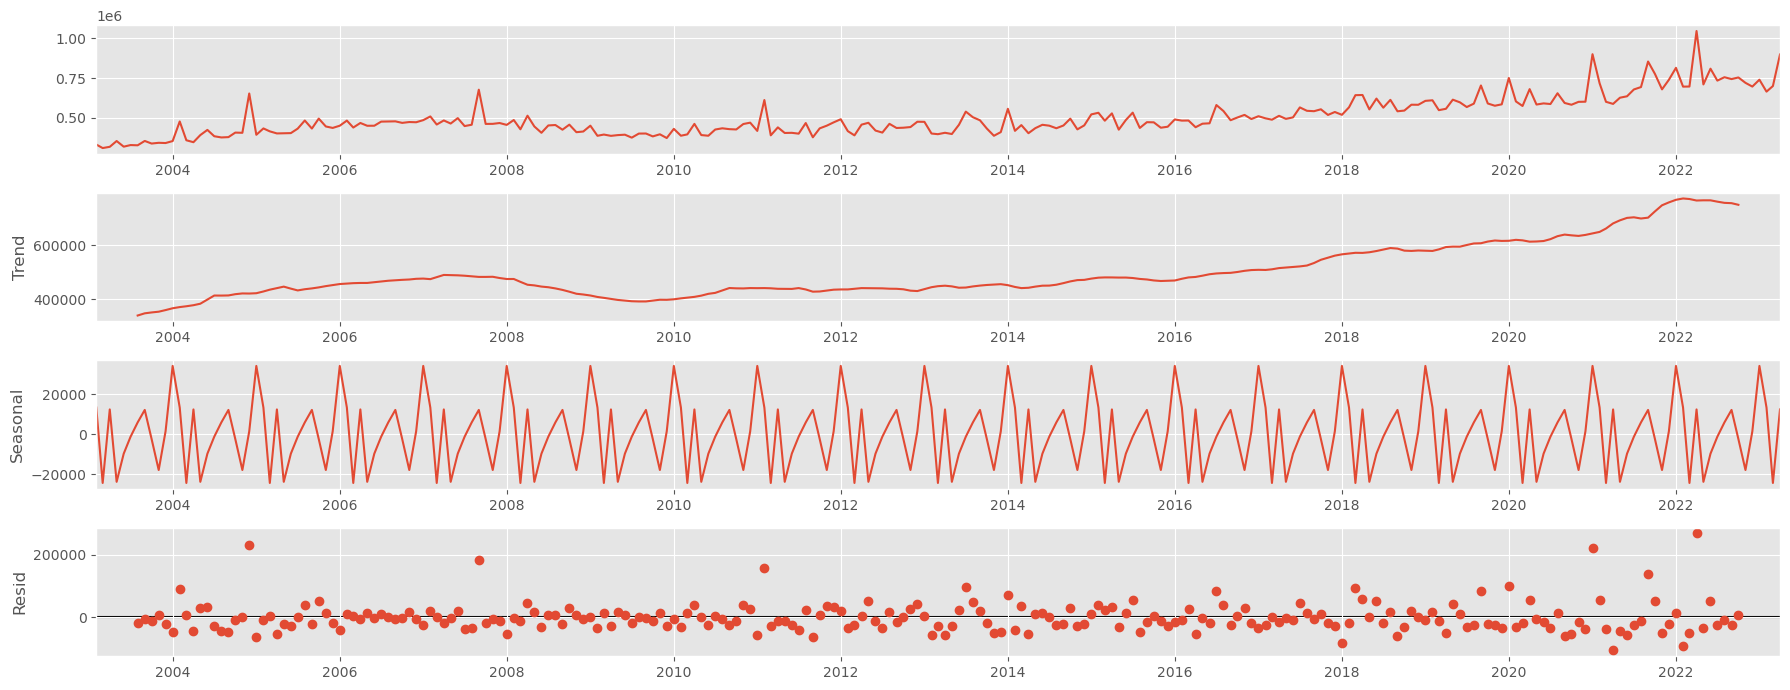

In [192]:
# Plot decomposed Staten Island price development

# Define fixed size for all charts
rcParams['figure.figsize'] = 18,7

# Plot charts
decomposition.plot()
plt.show()

The picture for Staten Island is in some ways similar to the Bronx: the effect of the 2008 financial crisis is mildly visible, but during the time in which prices slighly dropped in Manhattan and Brooklyn from 2020 to mid-2021, Staten Island continued to experience an upward trend. Actually, there is no visible Covid pandemic effect for Staten Island. 

With regards to noise in the data, the pictures for the Bronx and Staten Island differ significantly. While there's a low amount of noise in the Brooklyn data, noise in the Staten Island data is quite high. 

The time series analysis confirmed that both the 2008 financial crisis and the Covid-19 pandemic had an effect on NYC property prices. However, none of these effects seemed to seriously affect the dominant upward trend of prices. It never took longer than 1-2 years for prices to reach pre-drop levels and beyond. 

Furthermore, the time series comparison across boroughs confirmed that NYC is not a monolithic block when it comes to property prices: prices and their development differs across boroughs with two somewhat similar groups formed by Manhattan, Brooklyn and Queens on the one hand and the Bronx and Staten Island on the other hand. 

Before concluding the analysis, two more time series will be analysed in order to compare the development of prices for primarily residential properties with that of primarily non-residential properties. 

In [193]:
# Split df0regsl into residential and non-residential sales
df0regslresid = df0regsl.loc[df0regsl['resid_or_non-resid']=='residential']
df0regslnresid = df0regsl.loc[df0regsl['resid_or_non-resid'] == 'non-residential']

In [194]:
# Check accuracy of split
df0regsl['resid_or_non-resid'].value_counts(dropna=False)

residential        1102829
non-residential      57822
Name: resid_or_non-resid, dtype: int64

In [195]:
# Get dimensions of df0regslresid
df0regslresid.shape

(1102829, 16)

In [196]:
# Get dimensions of df0regslnresid
df0regslnresid.shape

(57822, 16)

In [197]:
# Create dataframes with irrelevant columns dropped
df_0_resid = df0regslresid.drop(columns=drop_cols_overall)
df_0_nresid = df0regslnresid.drop(columns=drop_cols_overall)

In [198]:
# Convert sale_date to index in dataframes
df_0_resid = df_0_resid.set_index('sale_date')
df_0_nresid = df_0_nresid.set_index('sale_date')

In [200]:
# Get monthly average price and store in new dataframes
df_0_resid_series = df_0_resid.resample('M').mean()
df_0_nresid_series = df_0_nresid.resample('M').mean()

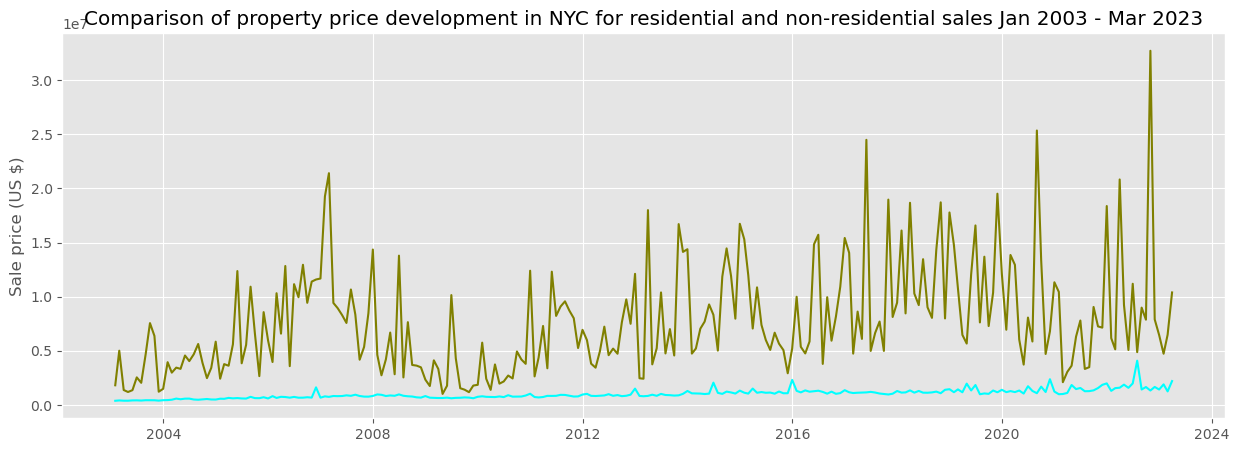

In [202]:
# Line chart for comparison of price development between residential and non-residential properties

# Set figure size and reduce quality of visual to dpi=100 to save RAM
plt.figure(figsize=(15,5), dpi=100)

# Add title and axis labels
plt.title('Comparison of property price development in NYC for residential and non-residential sales Jan 2003 - Mar 2023')
plt.ylabel('Sale price (US $)')

# Plot chart
plt.plot(df_0_resid_series, color='cyan')
plt.plot(df_0_nresid_series, color='olive')

Two observations are striking: 1) Prices for residential properties are constantly below prices for non-residential properties. 2) Prices for non-residential properties are a lot more volatile than for residential properties. 

In [203]:
# Decompose residential properties price development
decomposition = sm.tsa.seasonal_decompose(df_0_resid_series, model='additive')

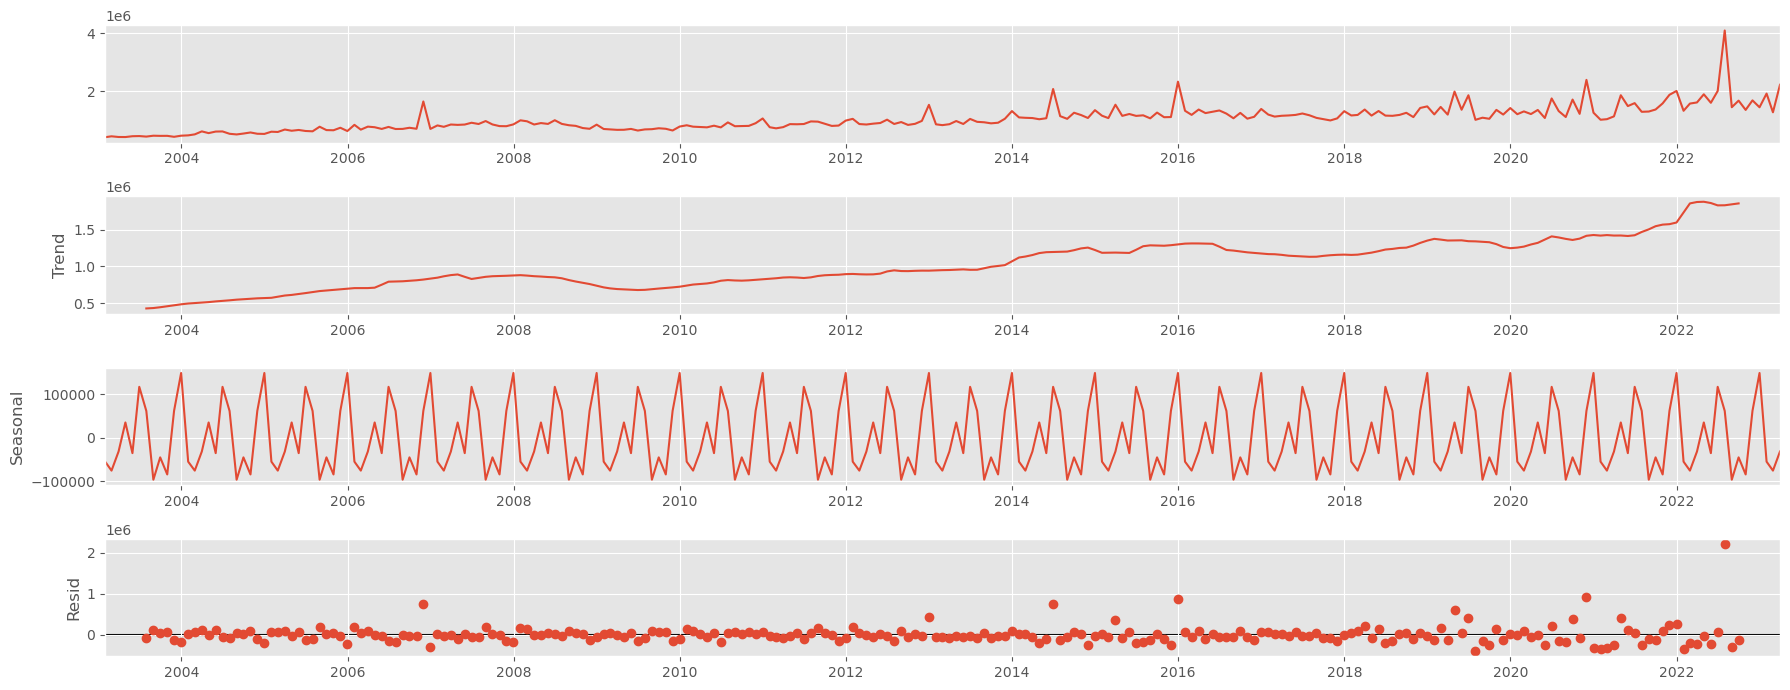

In [204]:
# Plot decomposed residential properties price development

# Define fixed size for all charts
rcParams['figure.figsize'] = 18,7

# Plot charts
decomposition.plot()
plt.show()

The decomposition reveals a dominant upward trend over time as well as an increase in noise over time for residential properties. 

In [205]:
# Decompose non-residential properties price development
decomposition = sm.tsa.seasonal_decompose(df_0_nresid_series, model='additive')

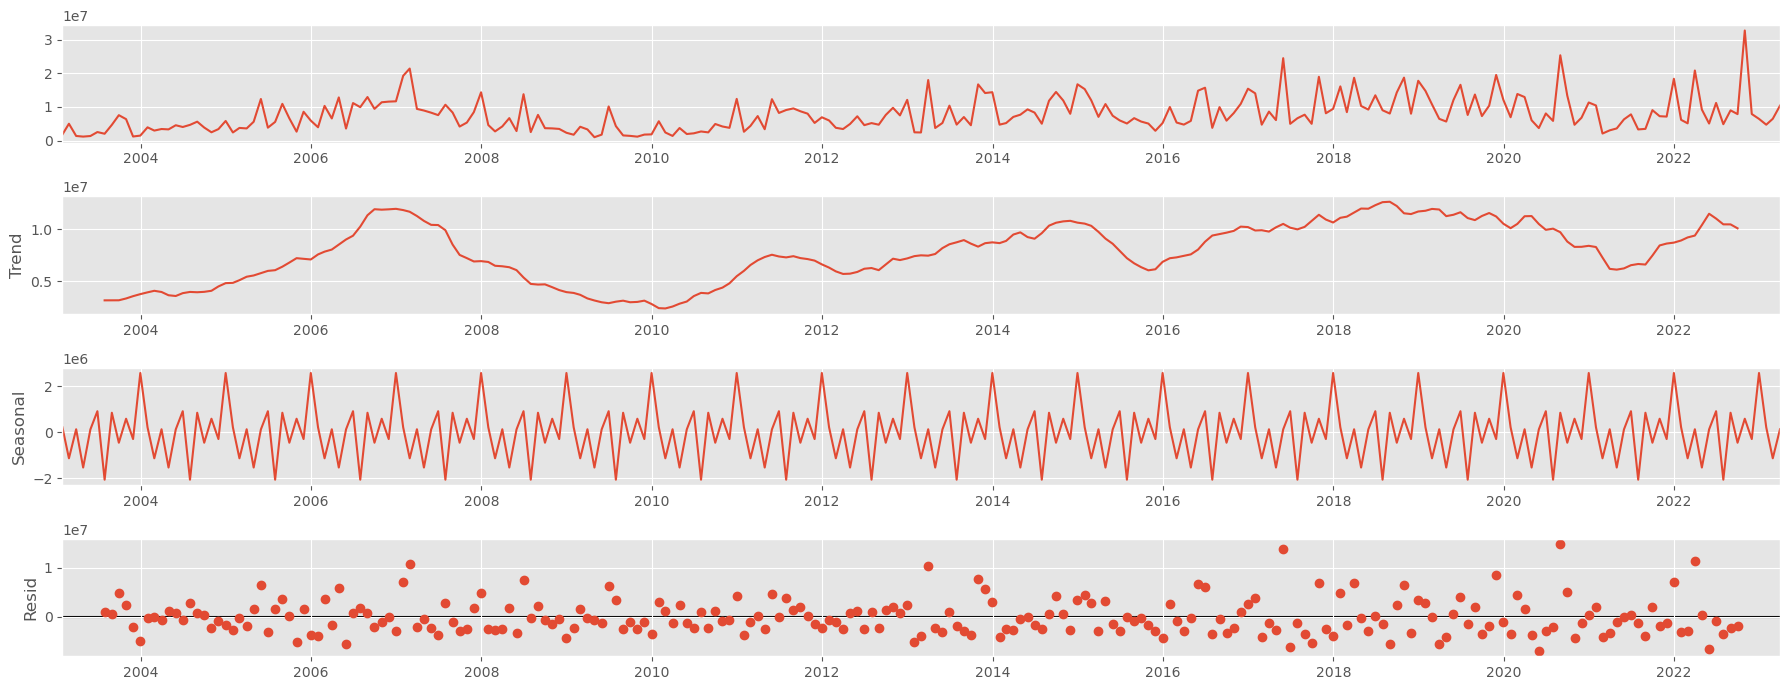

In [206]:
# Plot decomposed non-residential properties price development

# Define fixed size for all charts
rcParams['figure.figsize'] = 18,7

# Plot charts
decomposition.plot()
plt.show()

While the decomposition for non-residential properties also reveals a dominant upward trend over time, it additionally reveals a number of cycles in the dataset. While cycles were slightly visible before (especially for overall price development and for Manhattan prices), they were never as striking as for non-residential properties. 

Last, but not least while for residential properties the amount of noise was relatively low, only increasing towards the end of the observation period, noise was always high for residential properities.  

The comparison of analysis of time series for residential and non-residential properties has confirmed that price development for these two groups indeed differs significantly. 

# 09 Export dataframes

In [210]:
# Export pickle
df.to_pickle(os.path.join(path, '2023-08-19_df.pkl'))

In [211]:
# Export csv files for use in tableau
df.to_csv(os.path.join(path, '2023-08-19_df.csv'))
df_0_series.to_csv(os.path.join(path, '2023-08-19_time_overall.csv'))
df_1_series.to_csv(os.path.join(path, '2023-08-19_time_Manhattan.csv'))
df_2_series.to_csv(os.path.join(path, '2023-08-19_time_Bronx.csv'))
df_3_series.to_csv(os.path.join(path, '2023-08-19_time_Brooklyn.csv'))
df_4_series.to_csv(os.path.join(path, '2023-08-19_time_Queens.csv'))
df_5_series.to_csv(os.path.join(path, '2023-08-19_time_StatenIsland.csv'))
df_0_resid_series.to_csv(os.path.join(path, '2023-08-19_time_residential.csv'))
df_0_nresid_series.to_csv(os.path.join(path, '2023-08-19_time_non-residential.csv'))